<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/DS_Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12주차 실습 - 다중회귀분석(Multiple Linear Regression)**

- - -




### **<다중선형회귀분석>**

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99A0813C5E1D430625C52A" width="500" height="300">

* **Multiple linear regression (다중회귀분석)**

  : 다중회귀분석은 설명변수(독립변수)가 2개 이상인 회귀분석

  : 다중회귀분석에서 설명변수 개수가 많을 경우, 적절한 회귀모형 선택이 필요함

  : 회귀모형에 포함되는 설명변수의 선정 기준
      ㄱ) 반응변수(종속변수)와 높은 상관관계
      ㄴ) 선택된 설명변수들은 서로 낮은 상관관계를 보임(다중공선성 문제)
      ㄷ) 설명변수의 개수는 적을수록 유리

      * 다중공선성 관련 링크 : https://learnx.tistory.com/entry/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1Multicollinearity%EC%9D%B4%EB%9E%80

<br>

* **Feature selection (변수 선택법)**

  1) All possible regressions

  - 변수들의 가능한 모든 조합들로부터 최적의 모형을 찾아냄

  - 유의한 변수가 누락되지 않는 안전한 방법

  - 변수가 많을수록 탐색 시간이 급증함

  2) Forward stepwise selection (Forward selection)

  - 기여도가 높은 유의한 변수부터 하나씩 추가하는 기법

  - 빠른 계산이 장점

  - 이미 선택된 변수는 다시 제거되지 않음

  3) Backward stepwise selection (Backward elimination)

  - 모든 변수를 포함한 상태에서 불필요한 변수를 제거해나가는 방법

  - 중요한 변수가 제외될 가능성이 매우 적음

  - 이미 제외된 변수는 다시 선택되지 않음
  
  <br>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F999339425E1D4A5626C373" width="600" height="500">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F993971425E1D4A572FB764" width="600" height="500">


In [ ]:
install.packages(c("tidyverse", "data.table", "devtools", "scatterplot3d", "plotly","PerformanceAnalytics"))
library(tidyverse)
library(data.table)
library(devtools)
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hexbin’, ‘xts’, ‘quadprog’, ‘zoo’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: usethis



#### **A. 예제 1**

---


In [ ]:
Package_Data_List <- data(package = .packages(all.available = TRUE)) 
Package_Data_List

Warning message in data(package = .packages(all.available = TRUE)):
“datasets have been moved from package 'base' to package 'datasets'”
Warning message in data(package = .packages(all.available = TRUE)):
“datasets have been moved from package 'stats' to package 'datasets'”


In [ ]:
data("trees", package = "datasets")
?trees
# Girth 나무의 지름 
# Height 나무의 키
# Volumne 목재의 부피

In [ ]:
trees %>% as_tibble() %>% show()

# A tibble: 31 x 3
   Girth Height Volume
   <dbl>  <dbl>  <dbl>
 1   8.3     70   10.3
 2   8.6     65   10.3
 3   8.8     63   10.2
 4  10.5     72   16.4
 5  10.7     81   18.8
 6  10.8     83   19.7
 7  11       66   15.6
 8  11       75   18.2
 9  11.1     80   22.6
10  11.2     75   19.9
# … with 21 more rows


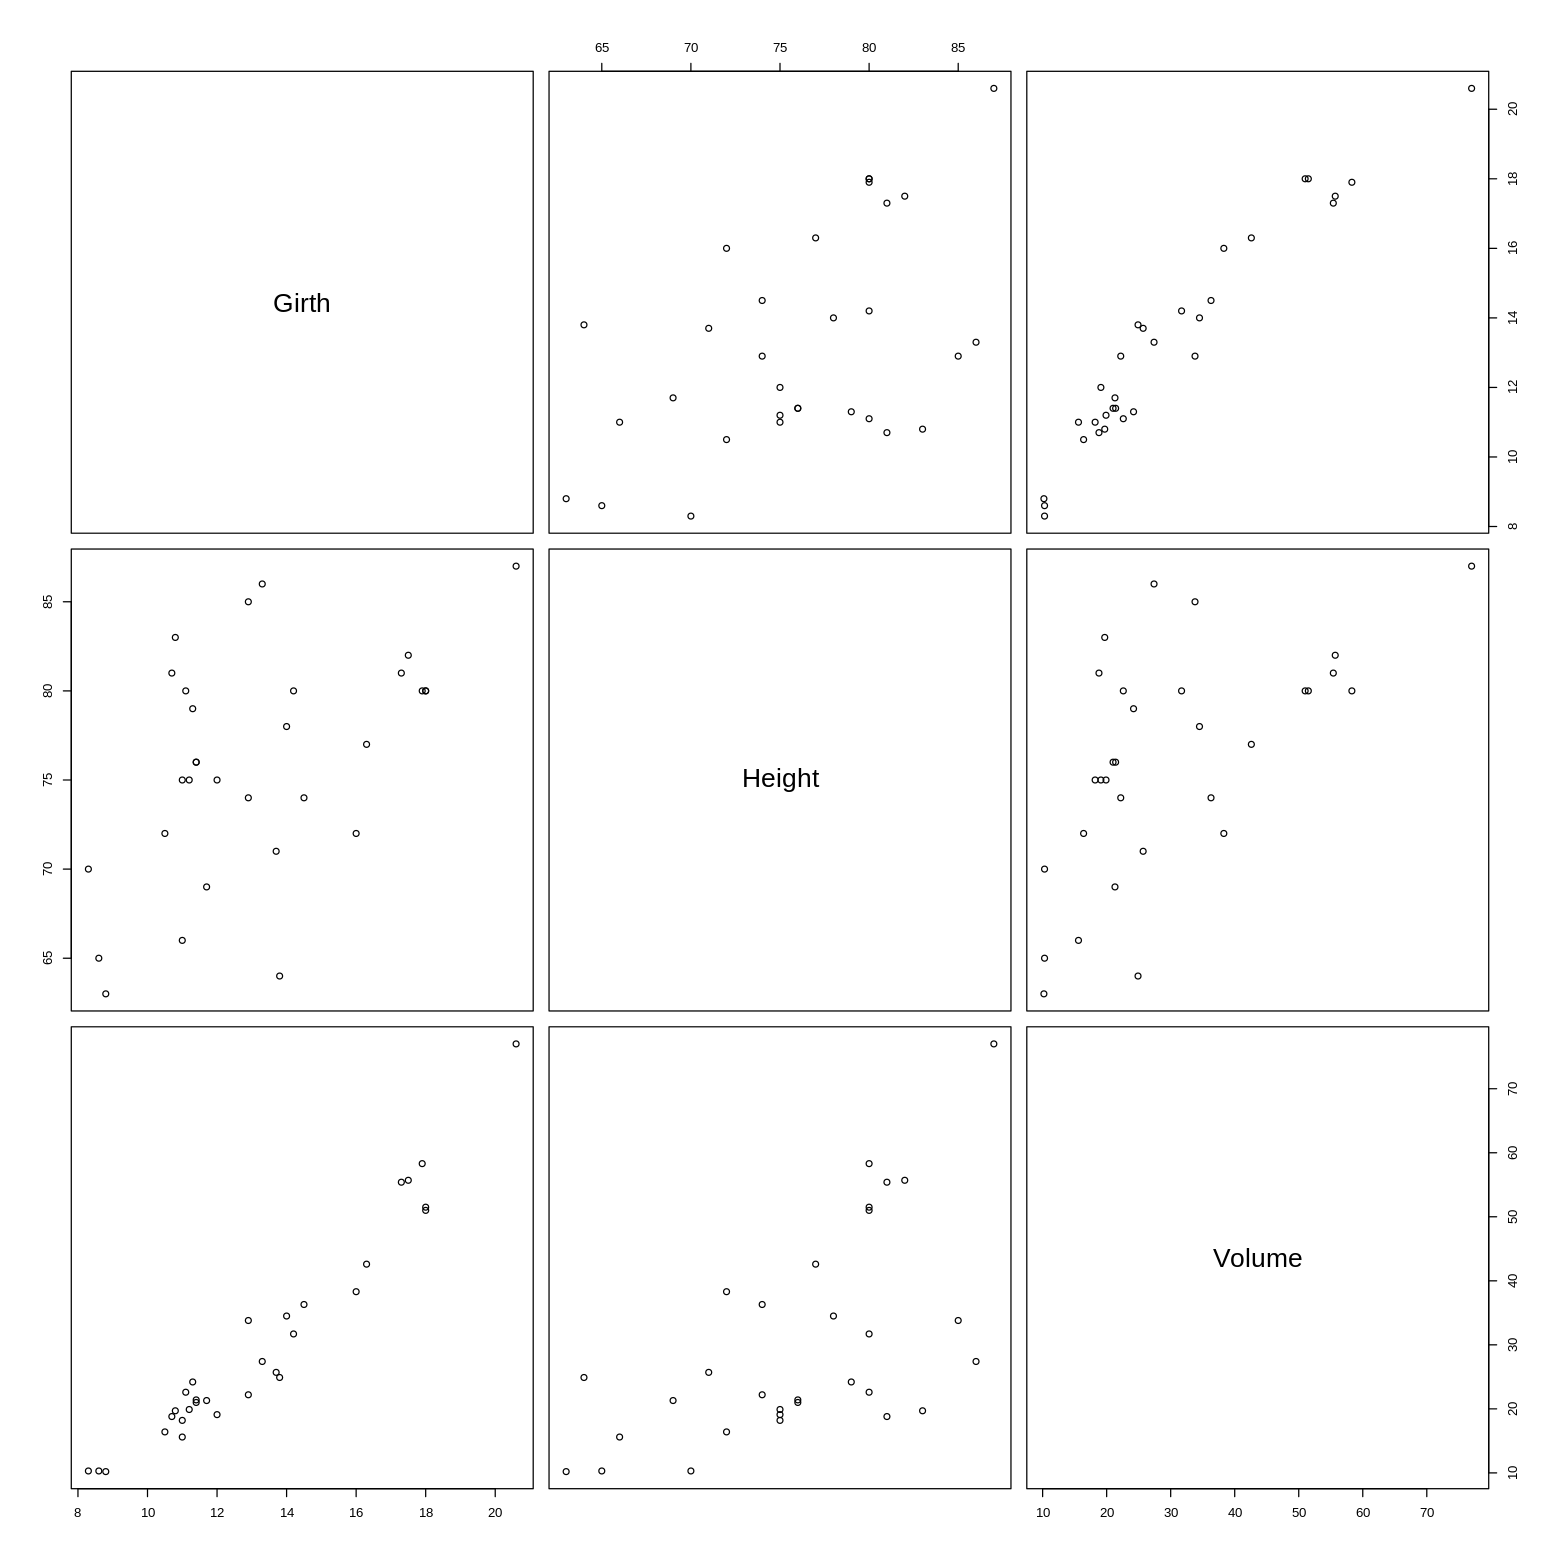

In [ ]:
options(repr.plot.width=13, repr.plot.height=13)
plot(trees)

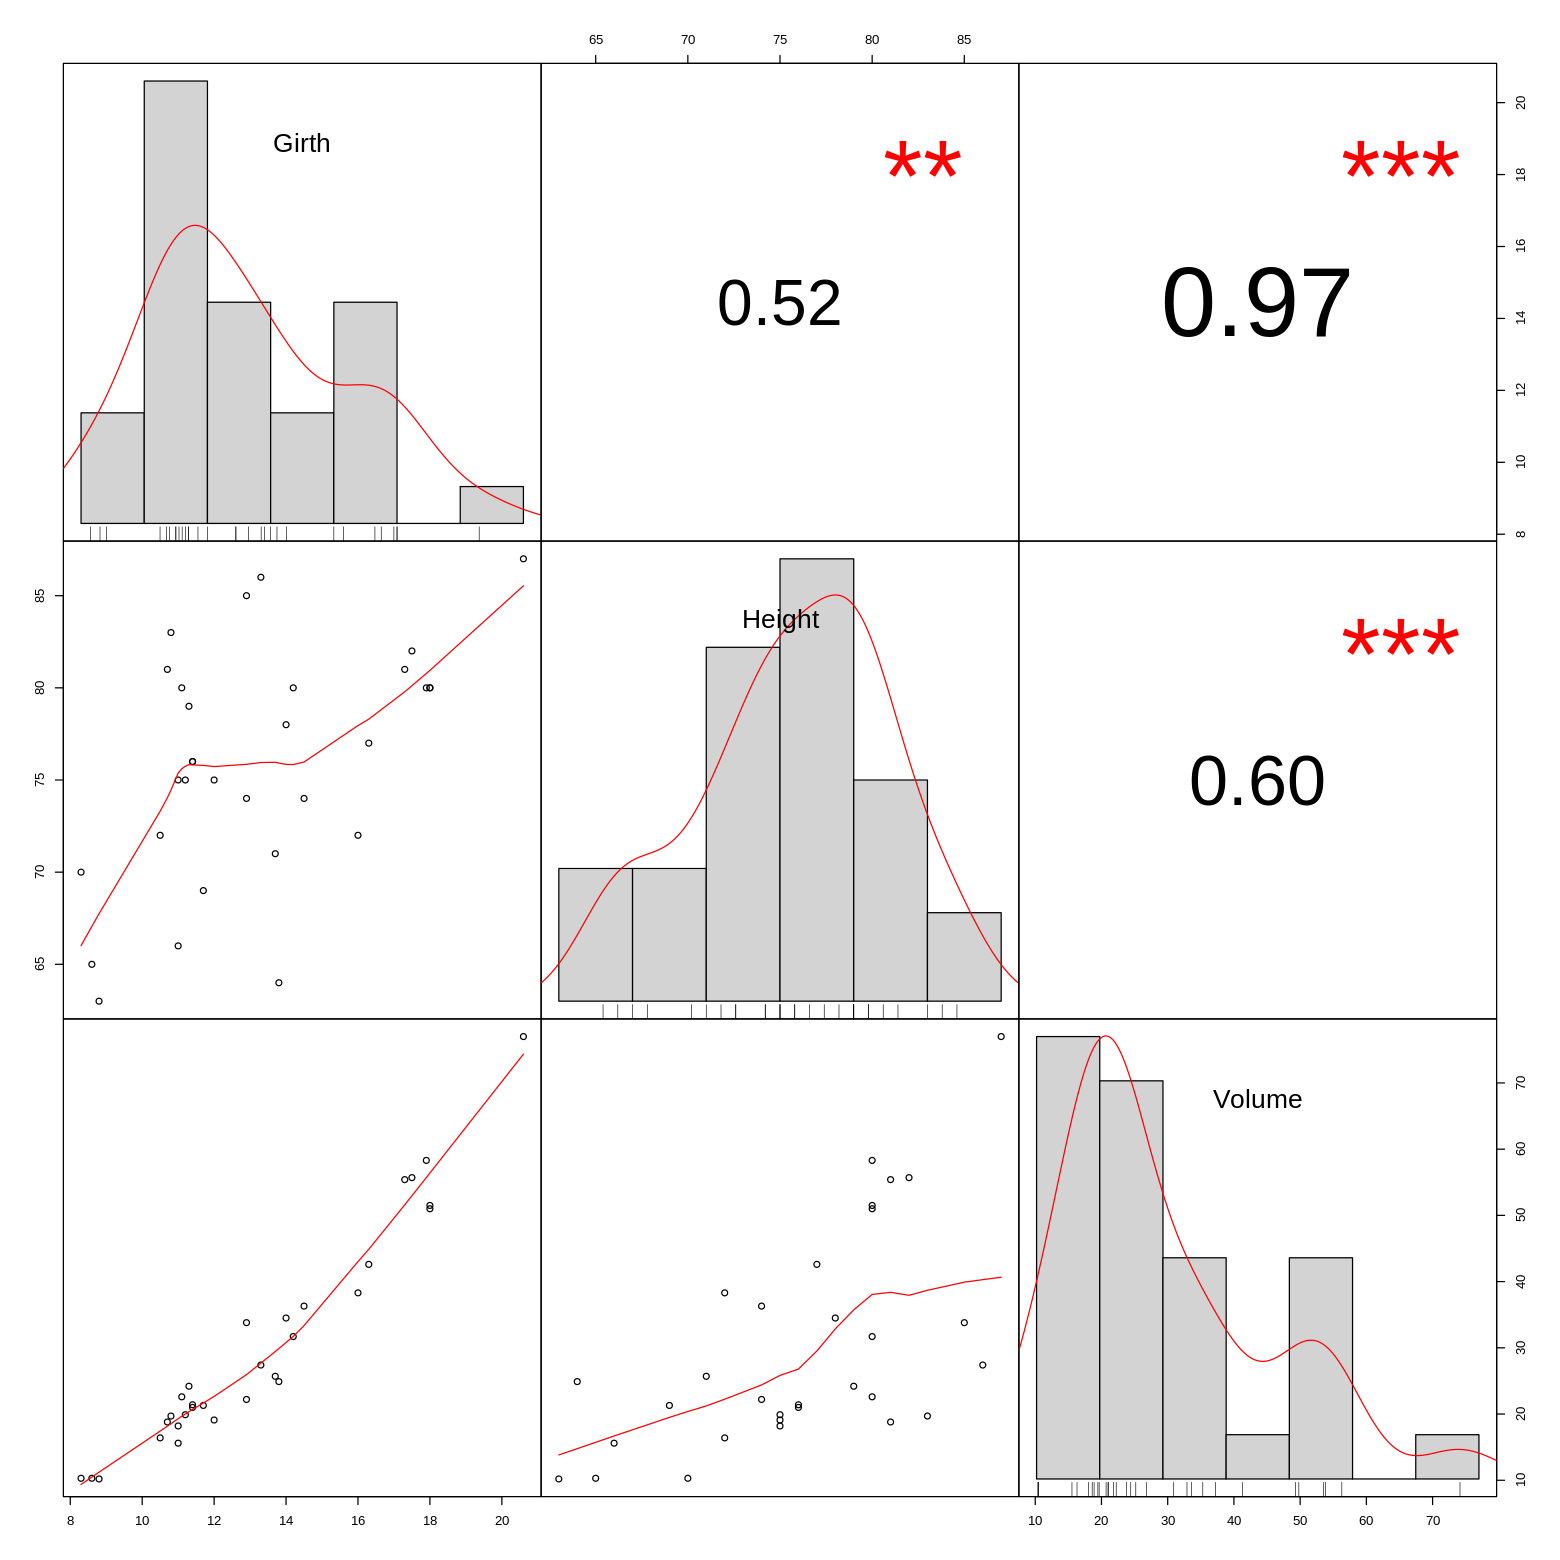

In [ ]:
library(PerformanceAnalytics)
chart.Correlation(trees, histogram=TRUE, pch=19)

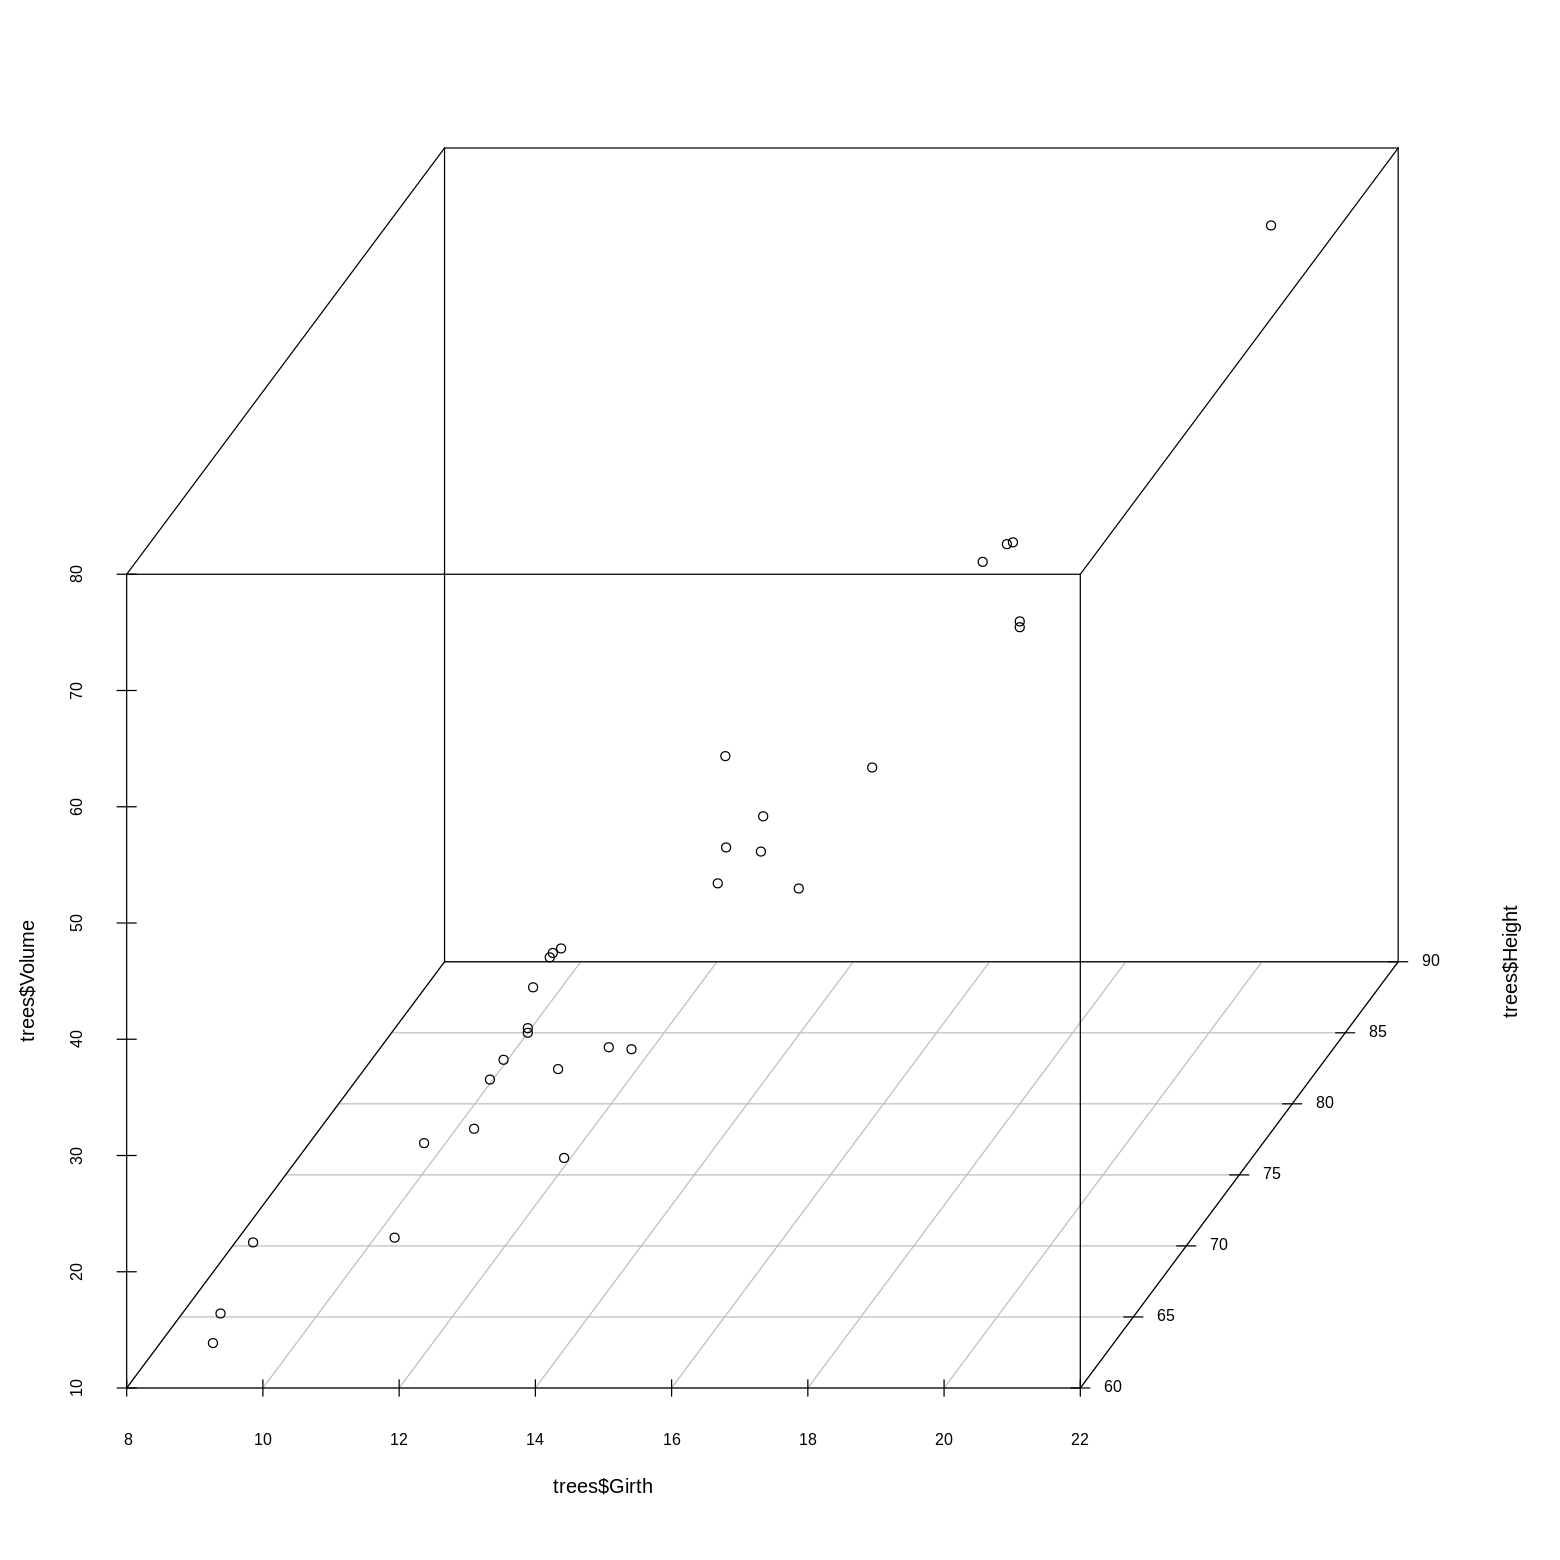

In [ ]:
scatterplot3d(trees$Girth, trees$Height, trees$Volume, angle = 55)

* **회귀식 추정**

``Volume = b0 + b1 * Girth + b2 * Height``


In [ ]:
model <- lm(Volume ~ ., data = trees)
model


Call:
lm(formula = Volume ~ ., data = trees)

Coefficients:
(Intercept)        Girth       Height  
   -57.9877       4.7082       0.3393  


* 회귀식 도출
```
b0 = -57.9877, b1 = 4.7082, b2 = 0.3393 으로부터 
Volume = -57.9877 + 4.7082 * Girth + 0.3393 * Height
Girth, Height가 1 증가할 때, Volume이  4.7082, 0.3393 증가
```




In [ ]:
summary(model)


Call:
lm(formula = Volume ~ ., data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


<결과의 해석>
```
** m1 모델 **
1. 제일 밑에 F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

2. 중간의 Coefficients:에는 y절편 값(Intercept) 및 변수들의 p-value 값이 나와있다. 모든 설명변수가 0.05보다 작으므로 Volume를 설명하는데 유의하다.

3. 밑 부분의 Adjusted R-squared 값은 0.9442 로, 94%만큼의 설명력을 가진다고 판단할 수 있다.
```

In [ ]:
# 변수의 상대적 중요도 파악
relweights <- function(fit,...){
         R <- cor(fit$model)
         nvar <- ncol(R)
         rxx <- R[2:nvar, 2:nvar]
         rxy <- R[2:nvar, 1]
         svd <- eigen(rxx)
         evec <- svd$vectors
         ev <- svd$values
         delta <- diag(sqrt(ev))
         lambda <- evec %*% delta %*% t(evec)
         lambdasq <- lambda ^ 2
         beta <- solve(lambda) %*% rxy
         rsquare <- colSums(beta ^ 2)
         rawwgt <- lambdasq %*% beta ^ 2
         import <- (rawwgt / rsquare) * 100
         import <- as.data.frame(import)
         row.names(import) <- names(fit$model[2:nvar])
         names(import) <- "Weights"
         import <- import[order(import),1, drop=FALSE]
         return(import)
}

plotRelWeights=function(fit){
  data<-relweights(fit)
  data$Predictors<-rownames(data)
  p<-ggplot(data=data,aes(x=reorder(Predictors,Weights),y=Weights,fill=Predictors))+ 
    geom_bar(stat="identity",width=0.5)+
    ggtitle("Relative Importance of Predictor Variables")+
    ylab(paste0("% of R-square \n(Total R-Square=",attr(data,"R-square"),")"))+
    geom_text(aes(y=Weights-0.1,label=paste(round(Weights,1),"%")),hjust=1,size=7)+
    theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5)) + 
    guides(fill=FALSE)+
    scale_fill_brewer(palette = "Set2")+
    coord_flip()
  return(p)
}

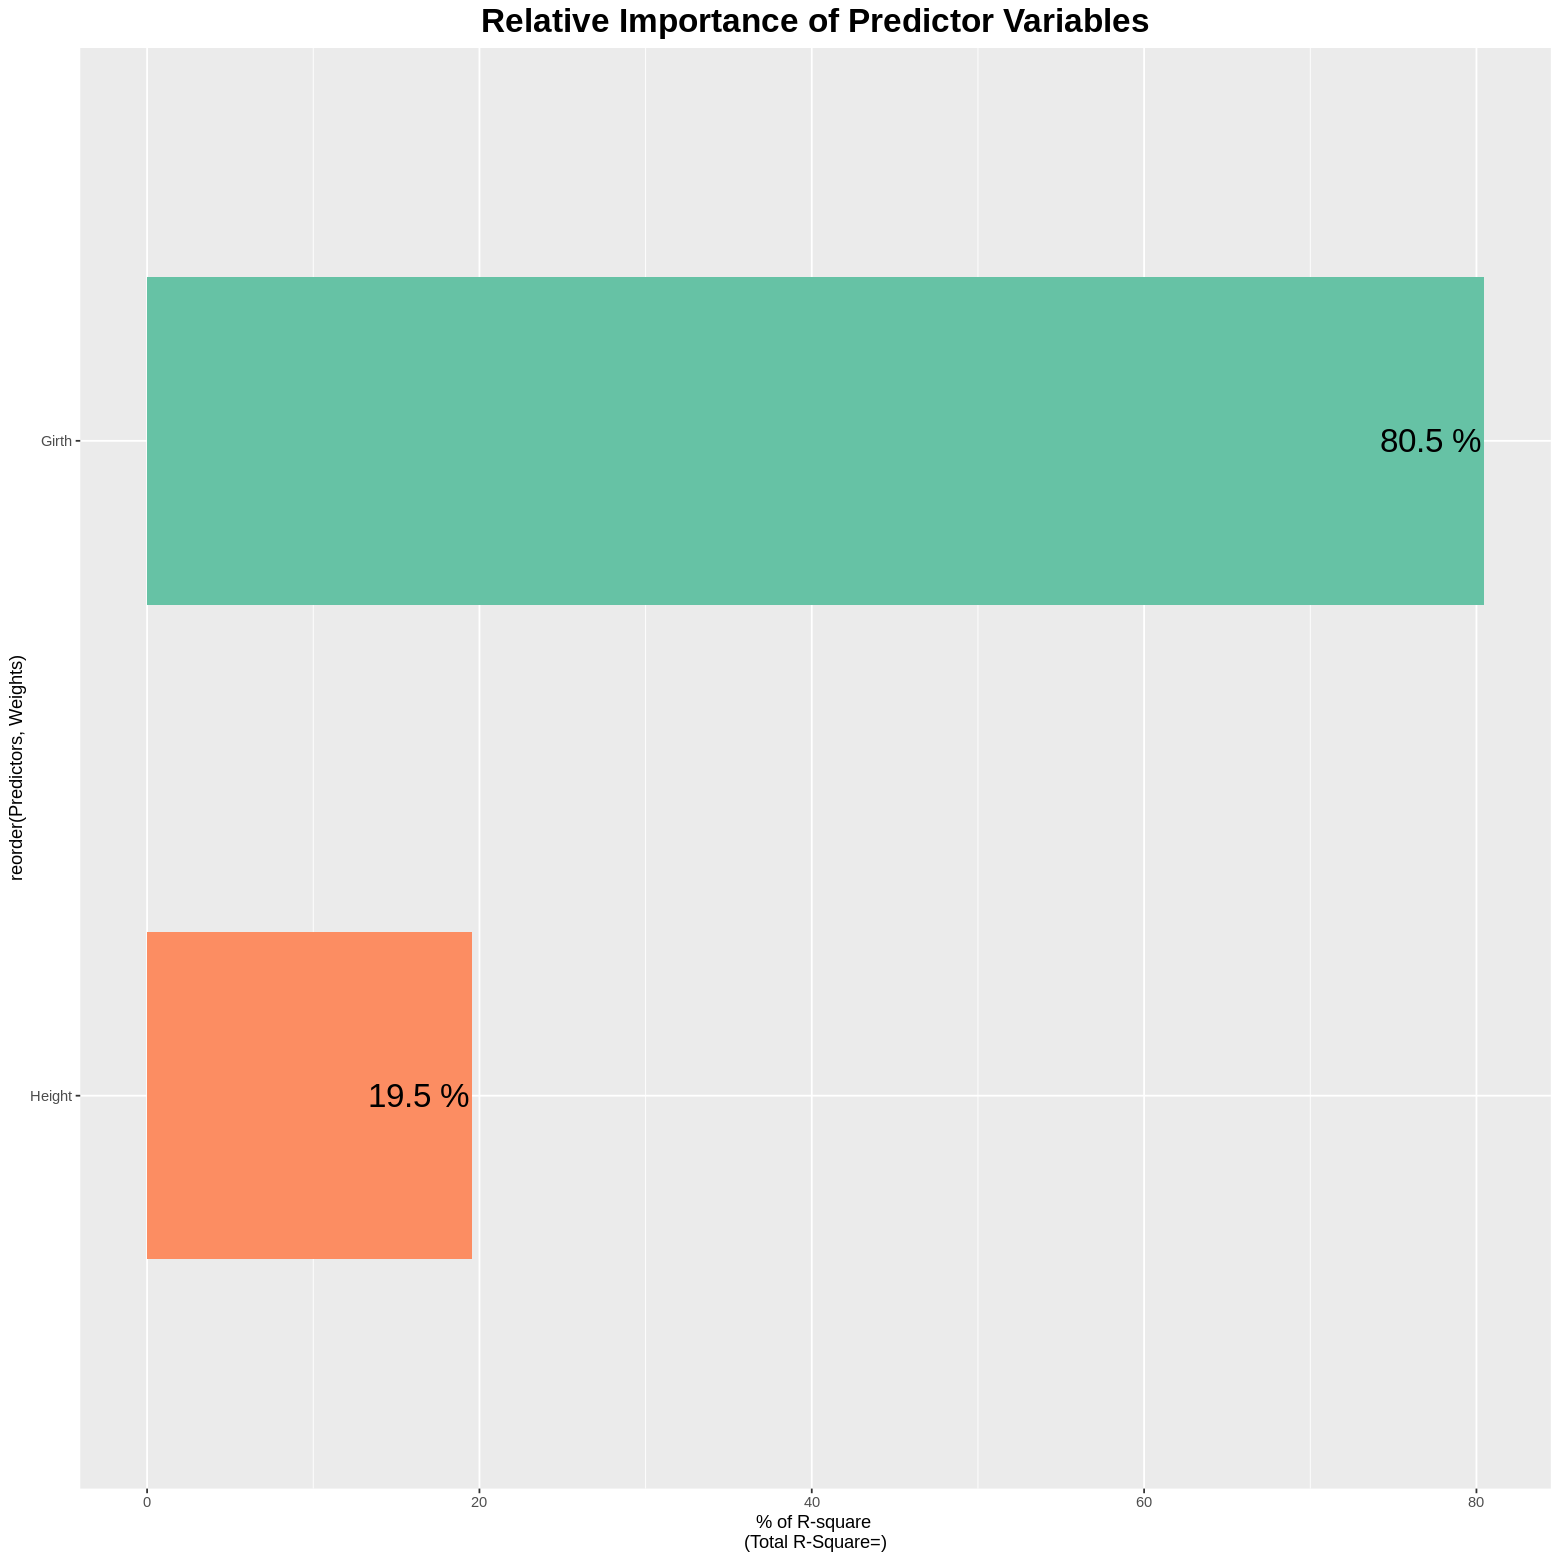

In [ ]:
plotRelWeights(model)

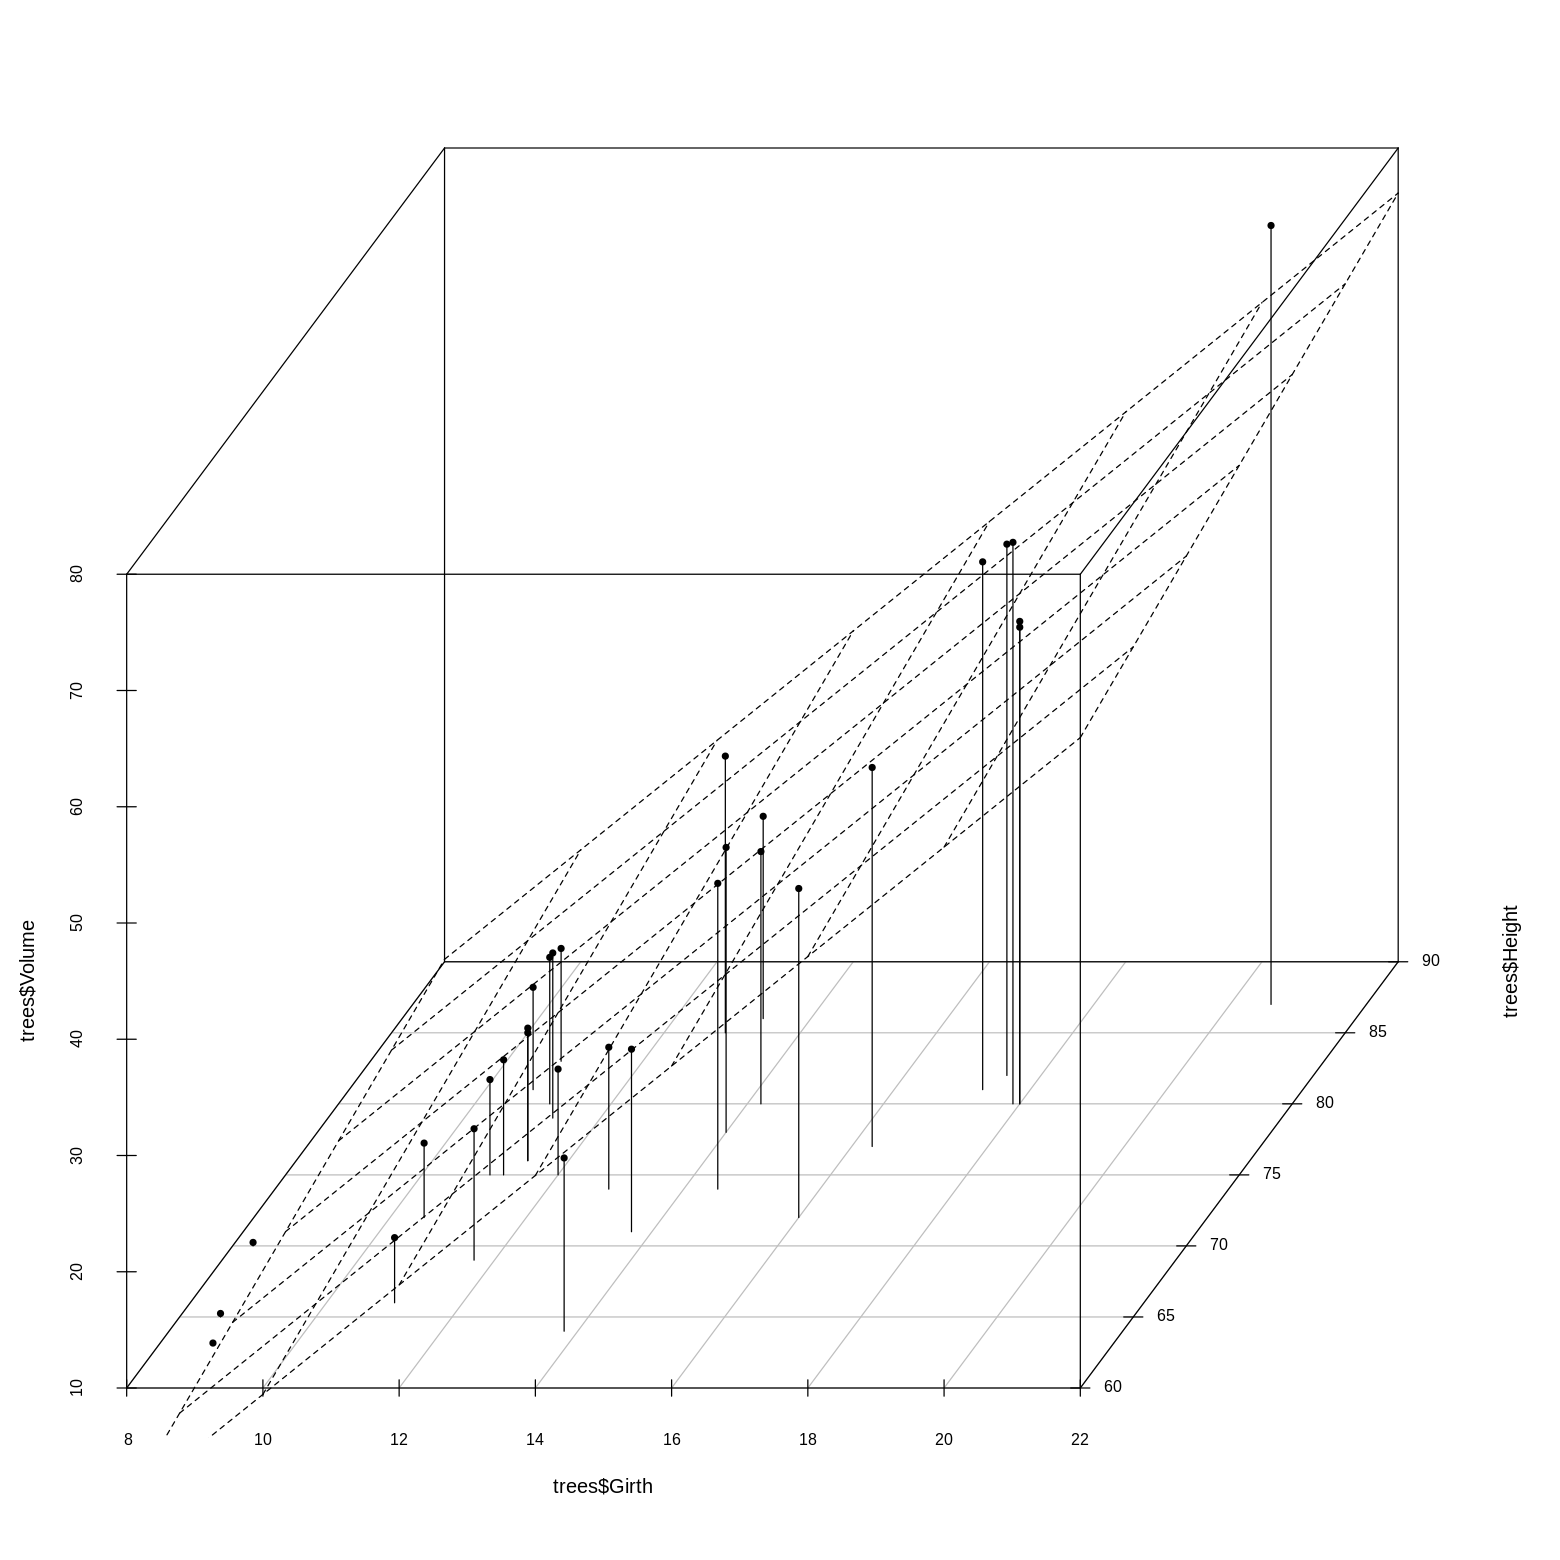

In [ ]:
# 3d 산점도
library(scatterplot3d)

s <- scatterplot3d(trees$Girth, trees$Height, trees$Volume, pch = 20, type = 'h', angle = 55, color = "black")
s$plane3d(model)

* **예측**

In [ ]:
set.seed(51)
girth_r <- sample(min(trees$Girth):max(trees$Girth), 13, replace = F)
height_r <- sample(min(trees$Height):max(trees$Height), 13, replace = F)

new_data <- tibble(Girth = girth_r, Height = height_r)

# predict
volume_r <- predict(model, new_data)

new_data <- new_data %>% bind_cols(tibble(volume_predict = volume_r))
new_data %>% show()

# A tibble: 13 x 3
   Girth Height volume_predict
   <dbl>  <int>          <dbl>
 1  14.3     81          36.8 
 2  10.3     80          17.6 
 3  15.3     85          42.9 
 4   8.3     66           3.48
 5  12.3     74          25.0 
 6   9.3     79          12.6 
 7  11.3     75          20.7 
 8  18.3     68          51.2 
 9  16.3     69          42.2 
10  20.3     78          64.0 
11  17.3     70          47.2 
12  13.3     73          29.4 
13  19.3     67          55.6 


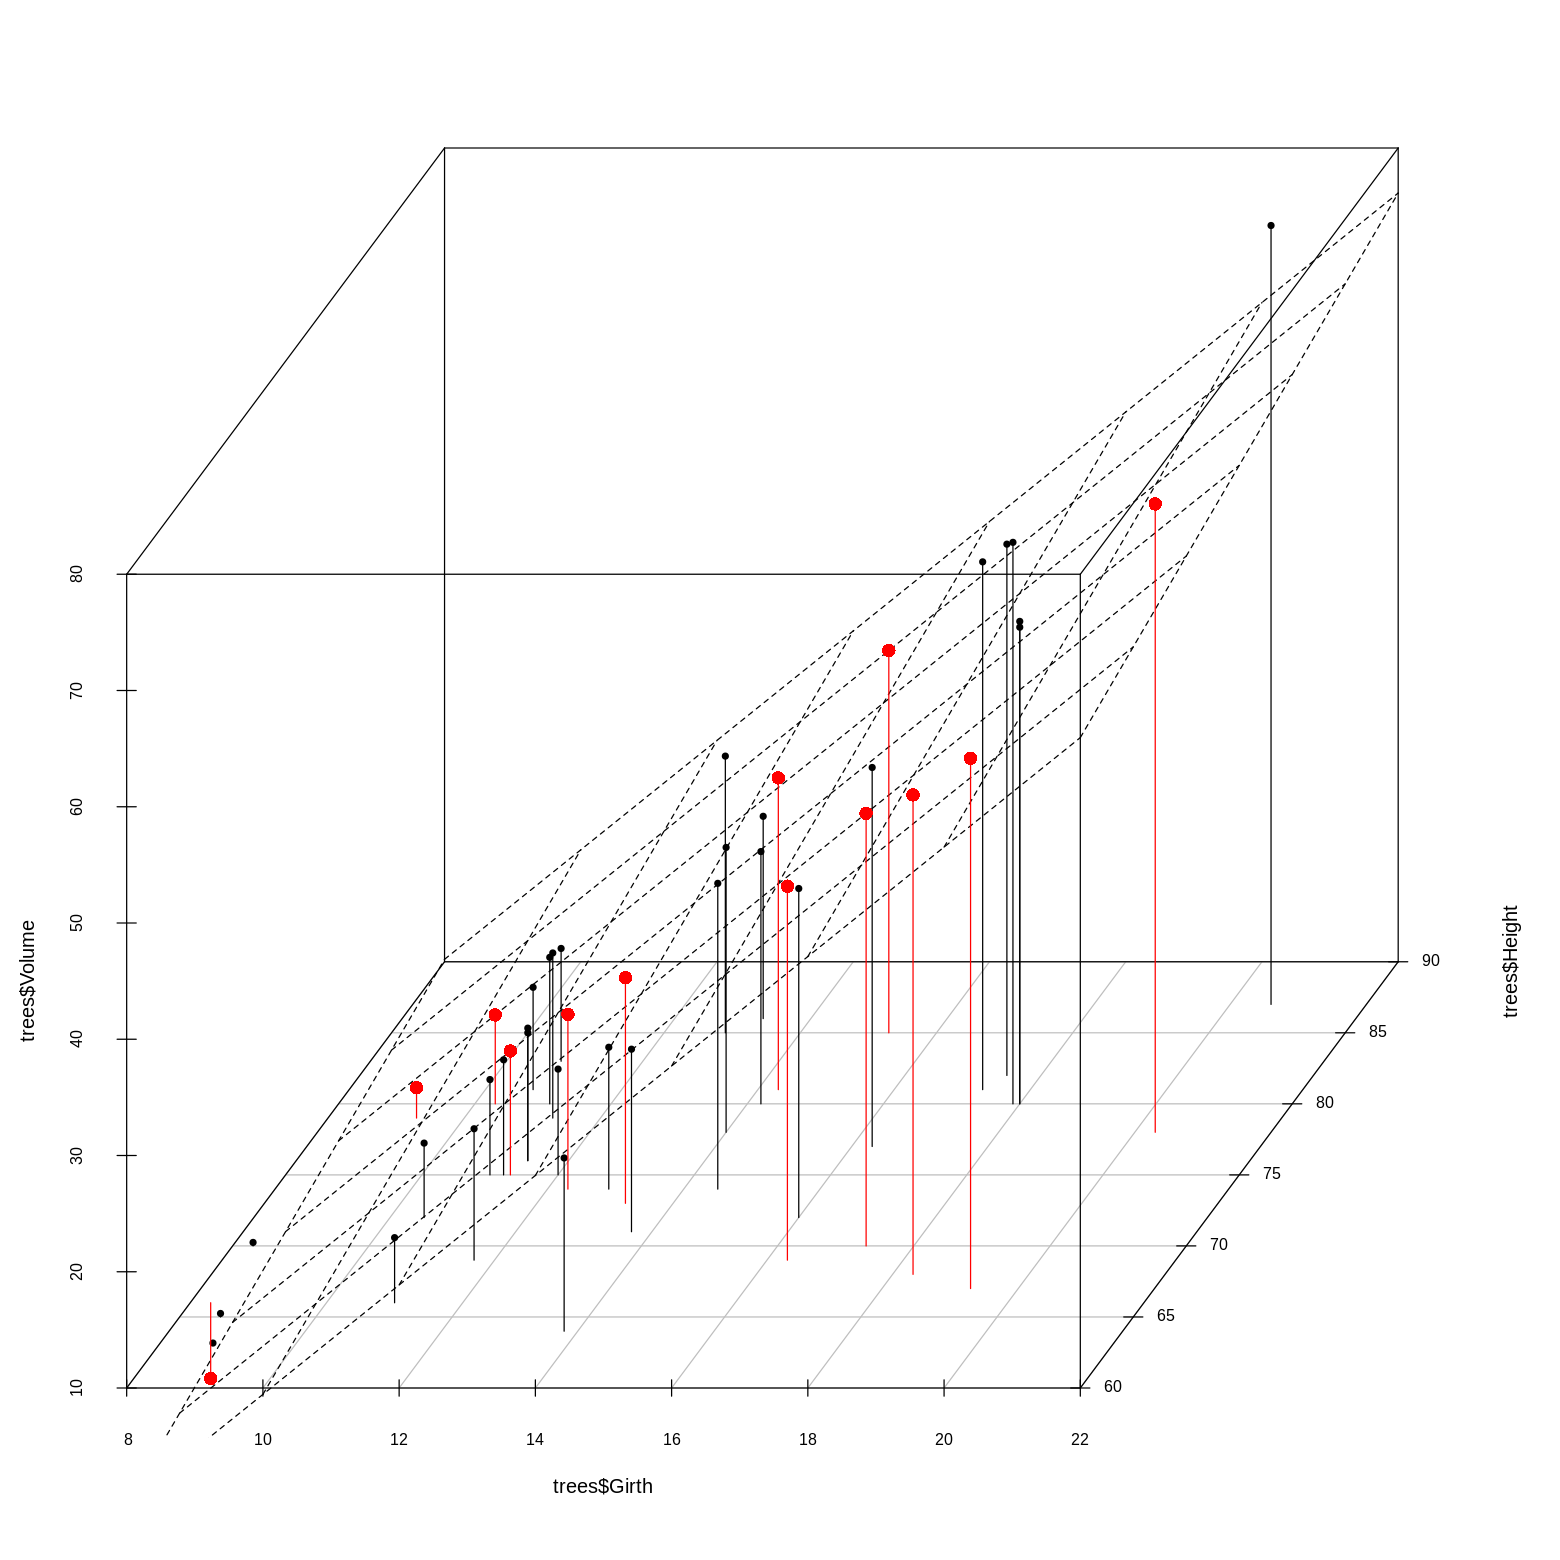

In [ ]:
# Add supplementary points
s <- scatterplot3d(trees$Girth, trees$Height, trees$Volume, pch = 20, type = 'h', angle = 55, color = "black")
s$plane3d(model)
s$points3d(new_data$Girth, new_data$Height, new_data$volume_predict , col = "red", type = "h", pch = 16, cex = 1.5)

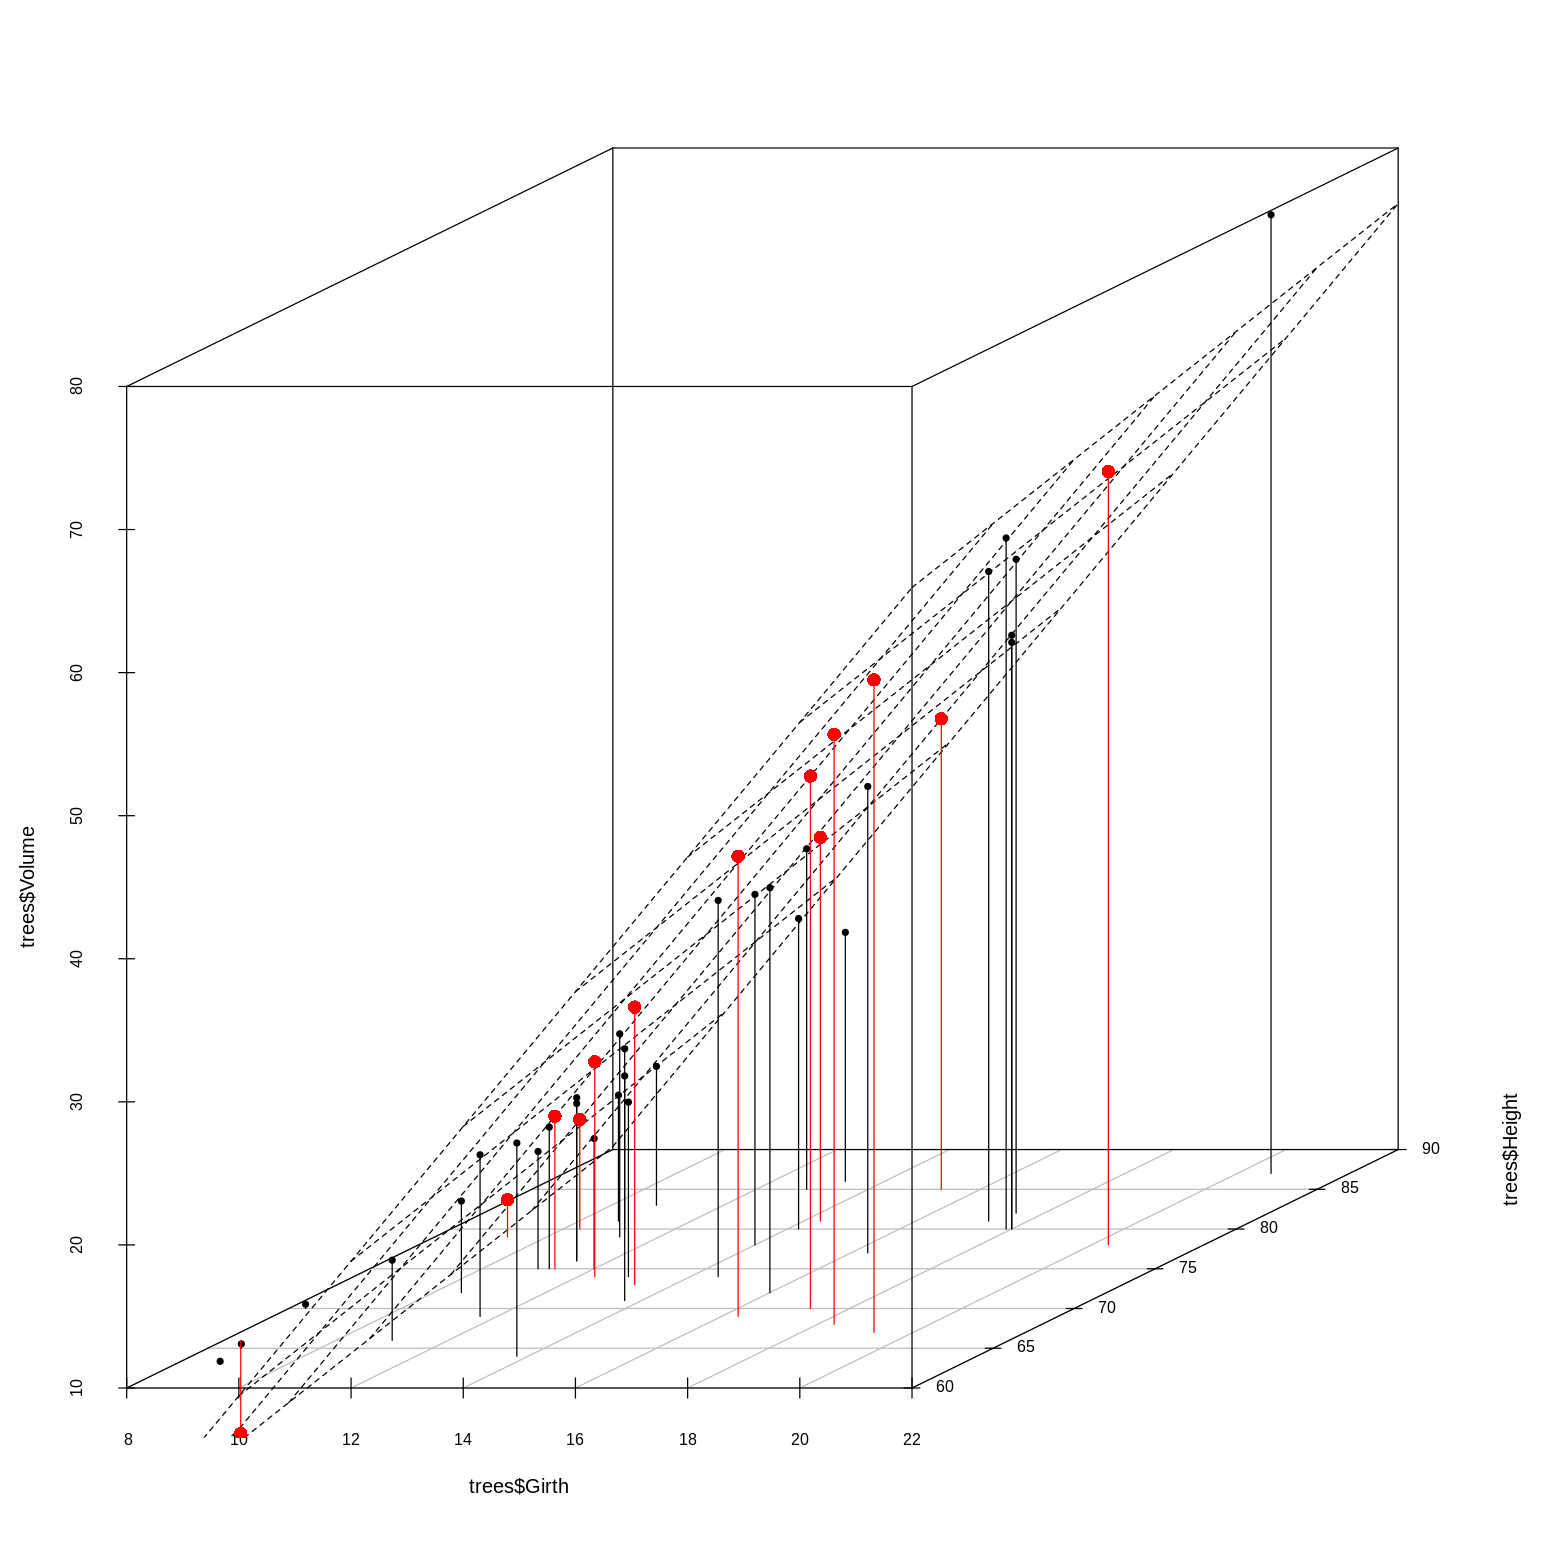

In [ ]:
# Add supplementary points
s <- scatterplot3d(trees$Girth, trees$Height, trees$Volume, pch = 20, type = 'h', angle = 25, color = "black")
s$plane3d(model)
s$points3d(new_data$Girth, new_data$Height, new_data$volume_predict , col = "red", type = "h", pch = 16, cex = 1.5)

- - -

#### **B. 예제 2**

In [ ]:
install_github("kassambara/datarium")
library(datarium)

Skipping install of 'datarium' from a github remote, the SHA1 (f9f9b3a6) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
data("marketing", package = "datarium")
marketing %>% as_tibble() %>% show()

# A tibble: 200 x 4
   youtube facebook newspaper sales
     <dbl>    <dbl>     <dbl> <dbl>
 1   276.     45.4       83.0 26.5 
 2    53.4    47.2       54.1 12.5 
 3    20.6    55.1       83.2 11.2 
 4   182.     49.6       70.2 22.2 
 5   217.     13.0       70.1 15.5 
 6    10.4    58.7       90    8.64
 7    69      39.4       28.2 14.2 
 8   144.     23.5       13.9 15.8 
 9    10.3     2.52       1.2  5.76
10   240.      3.12      25.4 12.7 
# … with 190 more rows


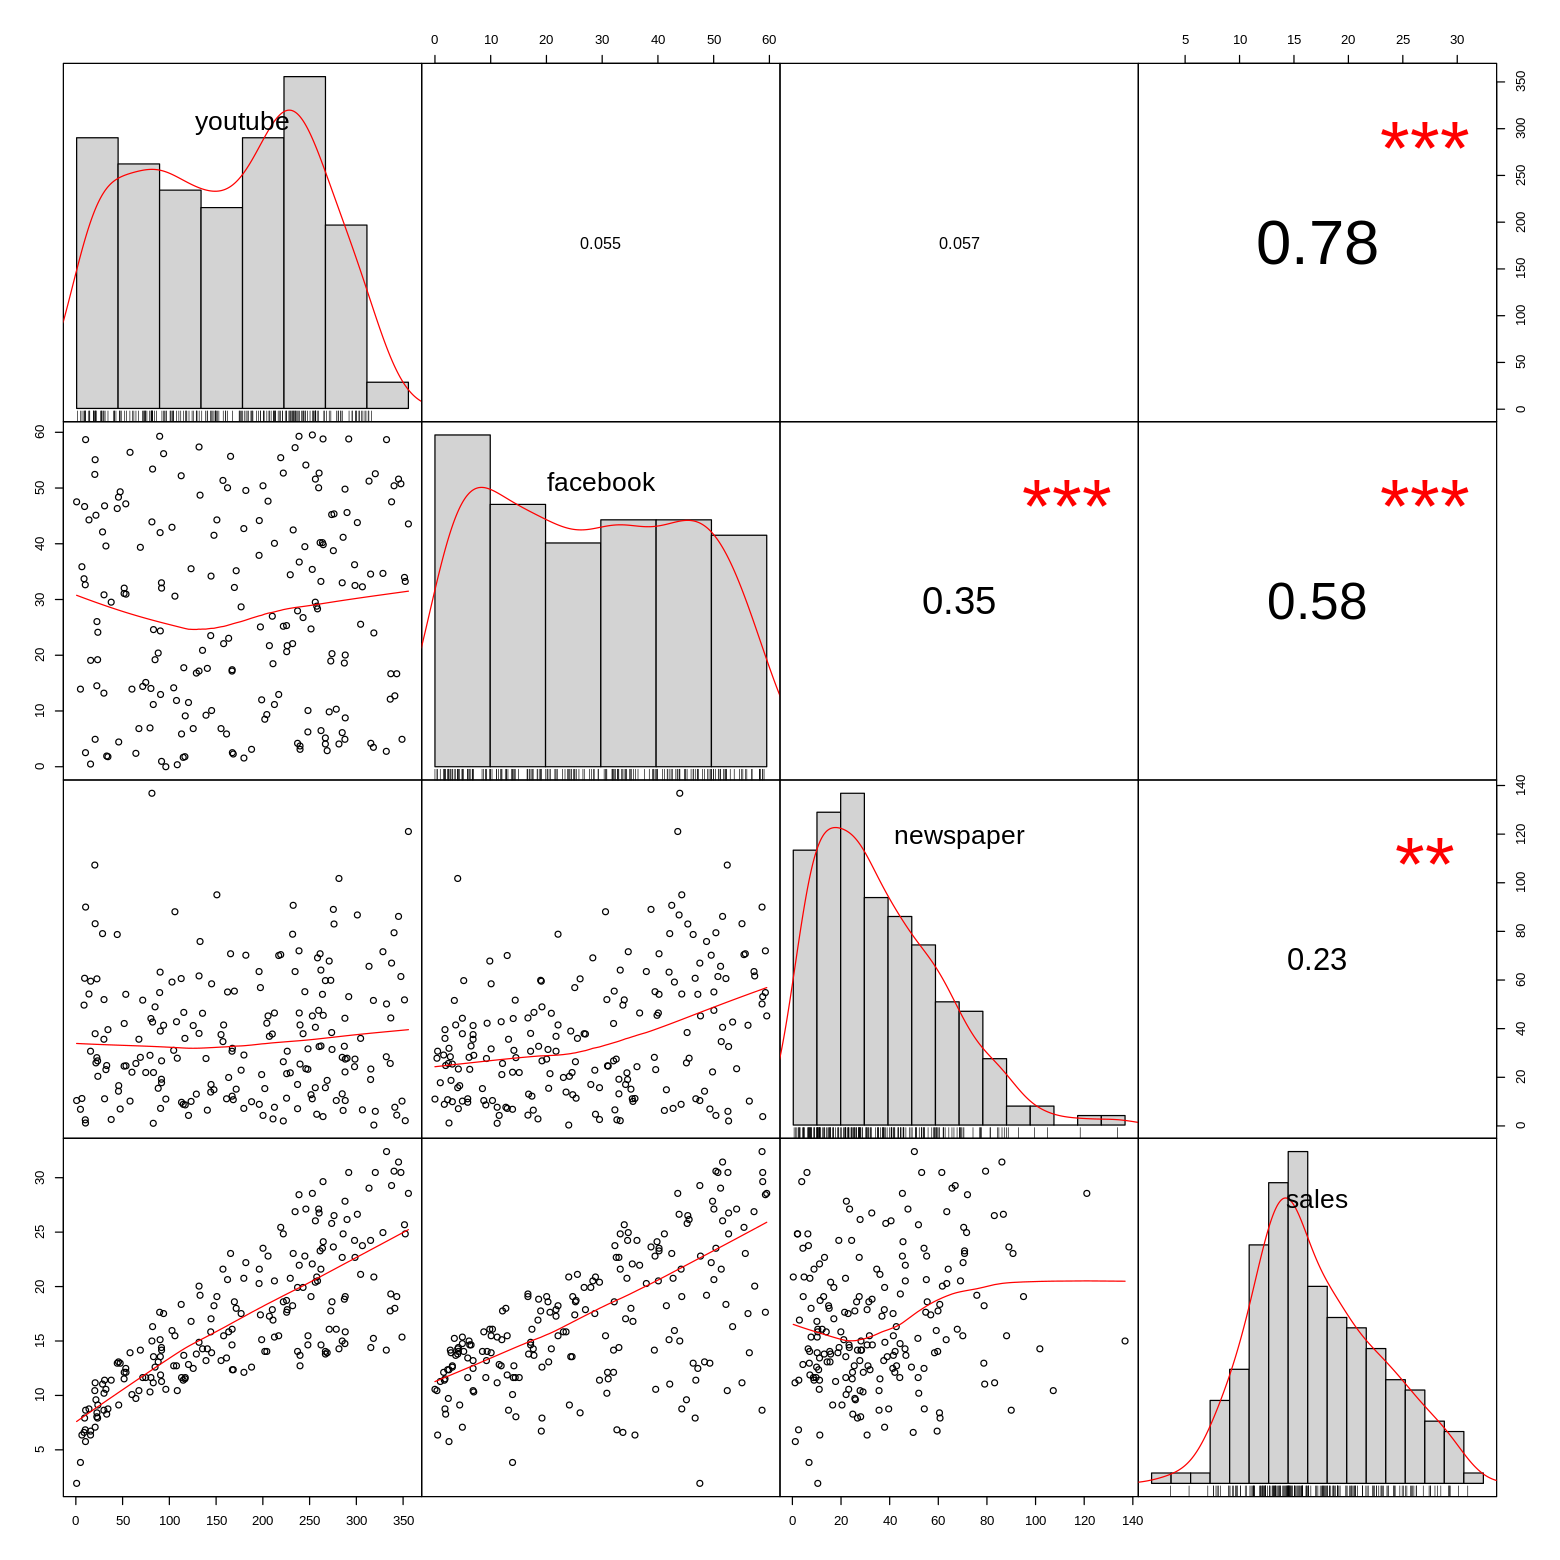

In [ ]:
library(PerformanceAnalytics)
chart.Correlation(marketing, histogram=TRUE, pch=19)

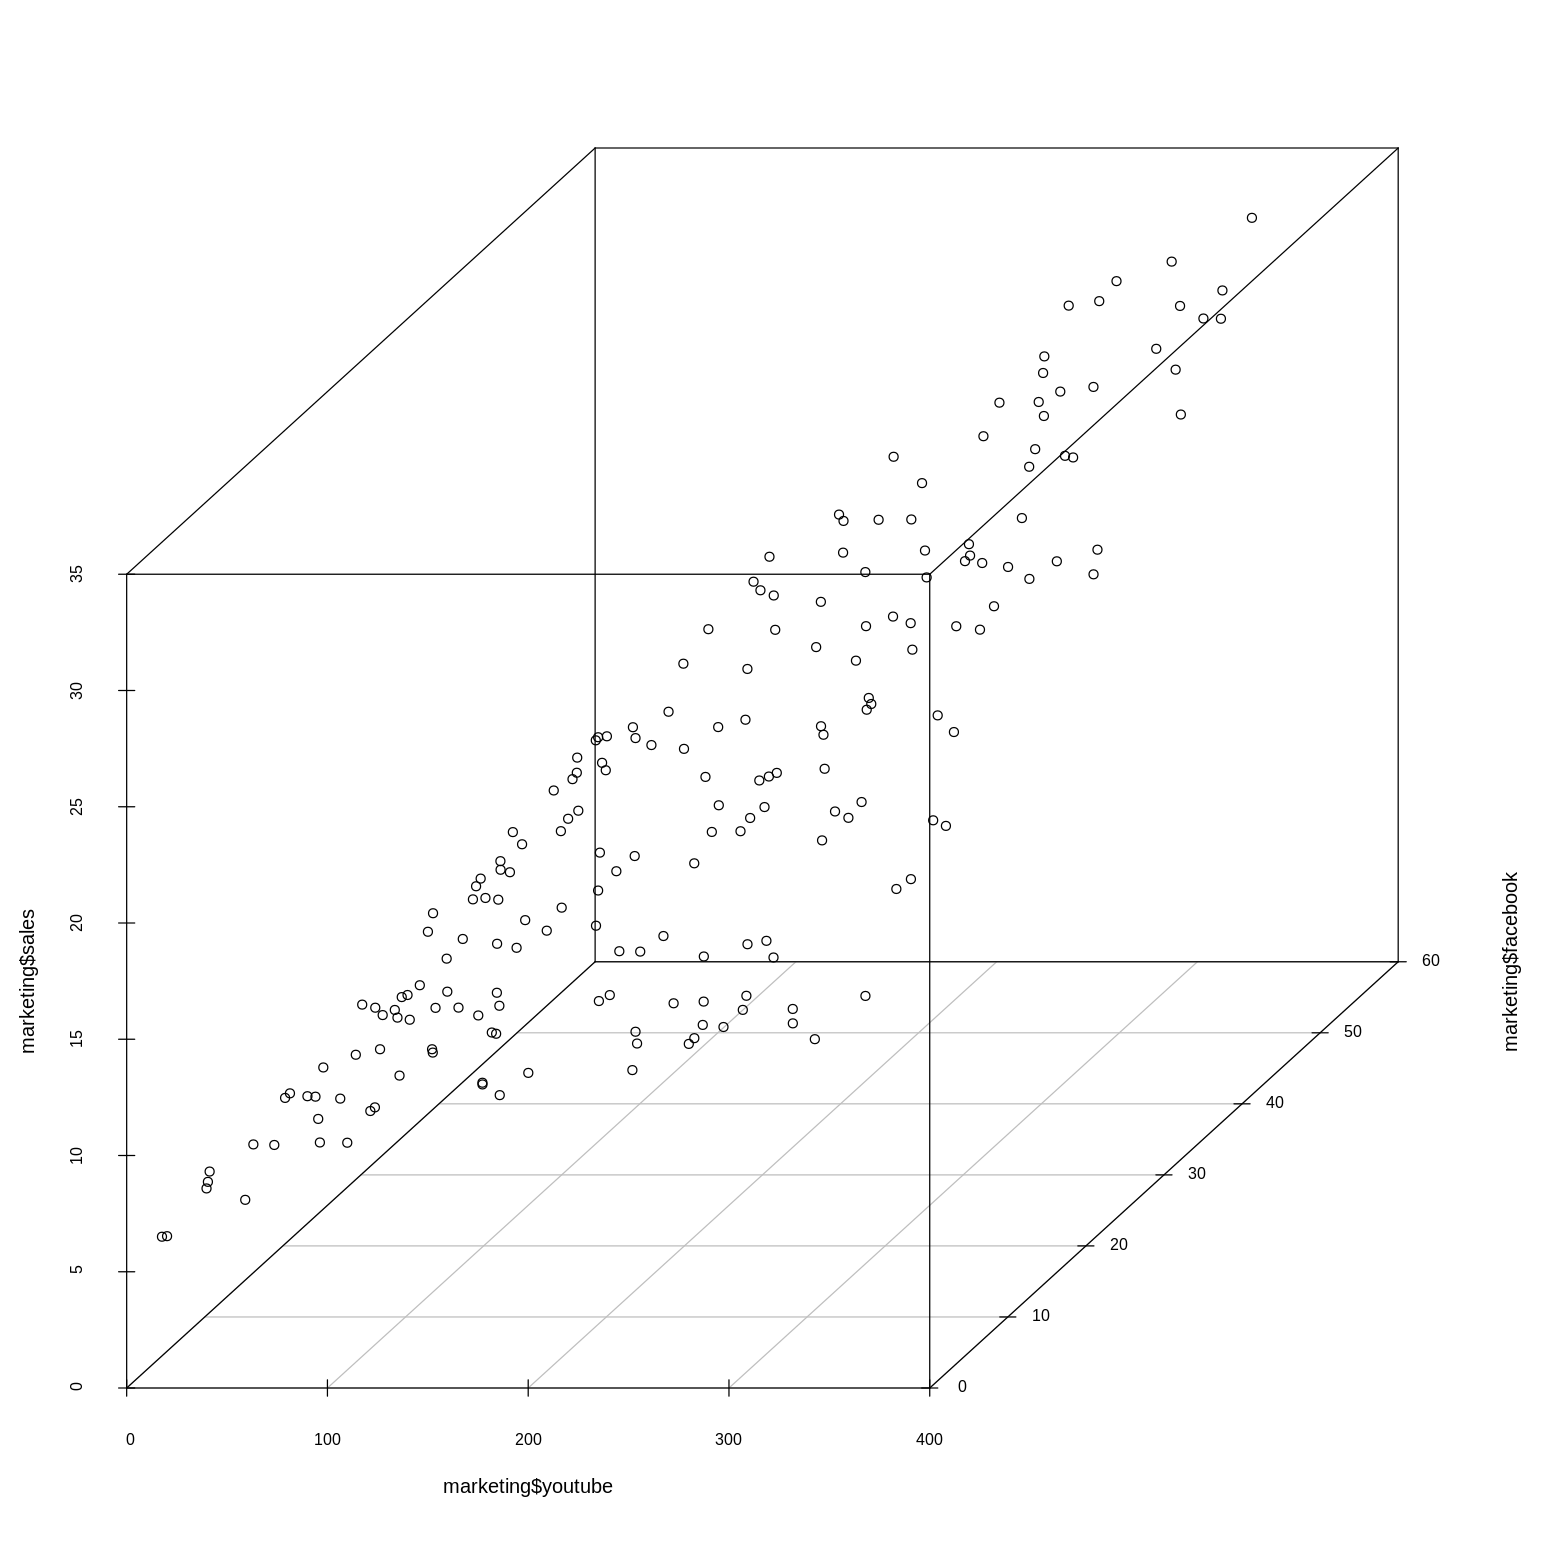

In [ ]:
scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, angle = 55)

In [ ]:
# plotly를 이용한 3d Sactterplot(https://plotly.com/r/3d-scatter-plots/)
# https://m.blog.naver.com/PostView.nhn?blogId=pmw9440&logNo=221590897819&proxyReferer=https:%2F%2Fwww.google.com%2F
# ftp://210.115.229.94/plotly_3d_scatter.html
library(plotly)
fig <- plot_ly(marketing, x = ~youtube, y = ~facebook, z = ~sales, color = ~sales)
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene = list(xaxis = list(title = 'YOUTUBE'),
                                   yaxis = list(title = 'FACEBOOK'),
                                   zaxis = list(title = 'SALES')))
fig

* **회귀식 추정**
``sales = b0 + b1 * youtube + b2 * facebook + b3 * newspaper ``


In [ ]:
model <- lm(sales ~ youtube + facebook + newspaper, data = marketing)
model


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Coefficients:
(Intercept)      youtube     facebook    newspaper  
   3.526667     0.045765     0.188530    -0.001037  


* 회귀식 도출
* ```
b0 = 3.52667, b1 = 0.045765, b2 = 0.188530, b3 = -0.001037 으로부터 
sales = 3.52667 + 0.045765 * youtube + 0.188530 * facebook + -0.001037 * newspaper
```


* youtube, facebook, newspaper이 1 증가할 때, sales가 0.045765, 0.188530, -0.001037이 증가

In [ ]:
summary(model)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5932  -1.0690   0.2902   1.4272   3.3951 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.526667   0.374290   9.422   <2e-16 ***
youtube      0.045765   0.001395  32.809   <2e-16 ***
facebook     0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.023 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


<결과의 해석>
```
** m1 모델 **
1. 제일 밑에 F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

2. 중간의 Coefficients:에는 y절편 값(Intercept) 및 변수들의 p-value 값이 나와있다. 
newspaper 변수의 경우 0.86으로 0.05보다 크기에 sales를 설명하는데 유의하지 않다.

3. 밑 부분의 Adjusted R-squared 값은 0.8956로, 89%만큼의 설명력을 가진다고 판단할 수 있다.
```

**<유의하지 않은 변수 제거>**

  * 위 다중회귀분석 결과에서 age와 ptl 변수가 유의하지 않은 것으로 확인됨

  * 아래의 3가지 방법 중 하나로, 유의하지 않은 변수를 제거할 수 있음

```
1) 유의하지 않은 변수를 누락하고 회귀모형을 새롭게 정의
model_2 <- lm(sales ~ youtube + facebook, data = marketing)

2) update 함수를 사용하여, 기존 회귀모형에서 유의하지 않은 변수 제거
model_2 <- update(model, .~. -newspaper)

3) step 함수를 사용하여, 기존 회귀모형에서 유의하지 않은 변수를 제거해나감
model_2 <- step(model, direction = "backward")
```

In [ ]:
# 1 번 방법
lm(sales ~ youtube + facebook, data = marketing)


Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
# 2 번 방법(update 사용)
update(model, .~. -newspaper)


Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
# 3 번 방법(step)
step(model, direction = "backward")

Start:  AIC=285.72
sales ~ youtube + facebook + newspaper

            Df Sum of Sq    RSS    AIC
- newspaper  1       0.1  802.0 283.75
<none>                    801.8 285.72
- facebook   1    1960.9 2762.7 531.13
- youtube    1    4403.5 5205.4 657.83

Step:  AIC=283.75
sales ~ youtube + facebook

           Df Sum of Sq    RSS    AIC
<none>                   802.0 283.75
- facebook  1    2225.7 3027.6 547.44
- youtube   1    4408.7 5210.6 656.03



Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
model_2 <- lm(sales ~ youtube + facebook, data = marketing)
summary(model_2)


Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5572  -1.0502   0.2906   1.4049   3.3994 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.50532    0.35339   9.919   <2e-16 ***
youtube      0.04575    0.00139  32.909   <2e-16 ***
facebook     0.18799    0.00804  23.382   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.018 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


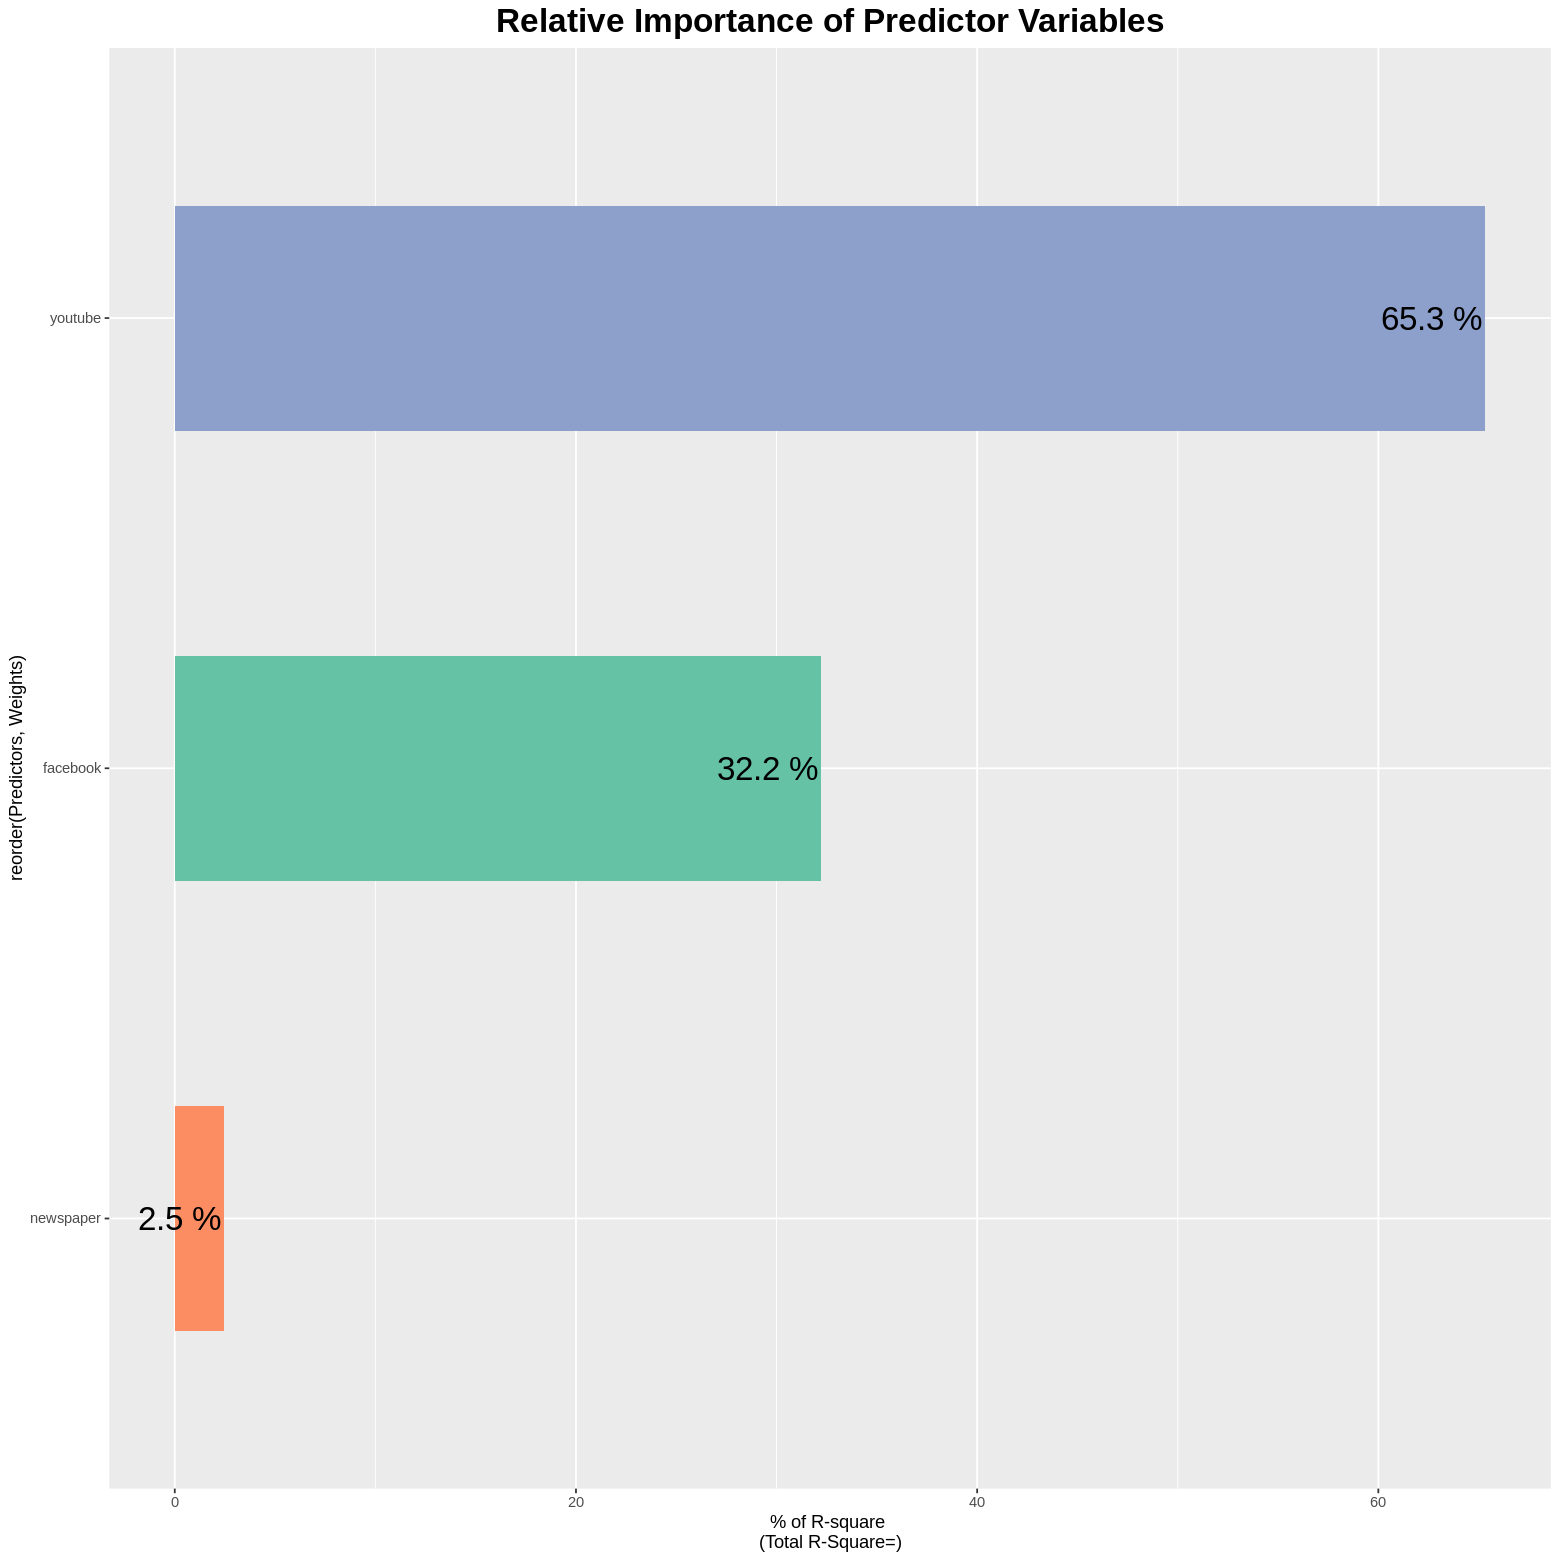

In [ ]:
plotRelWeights(model)

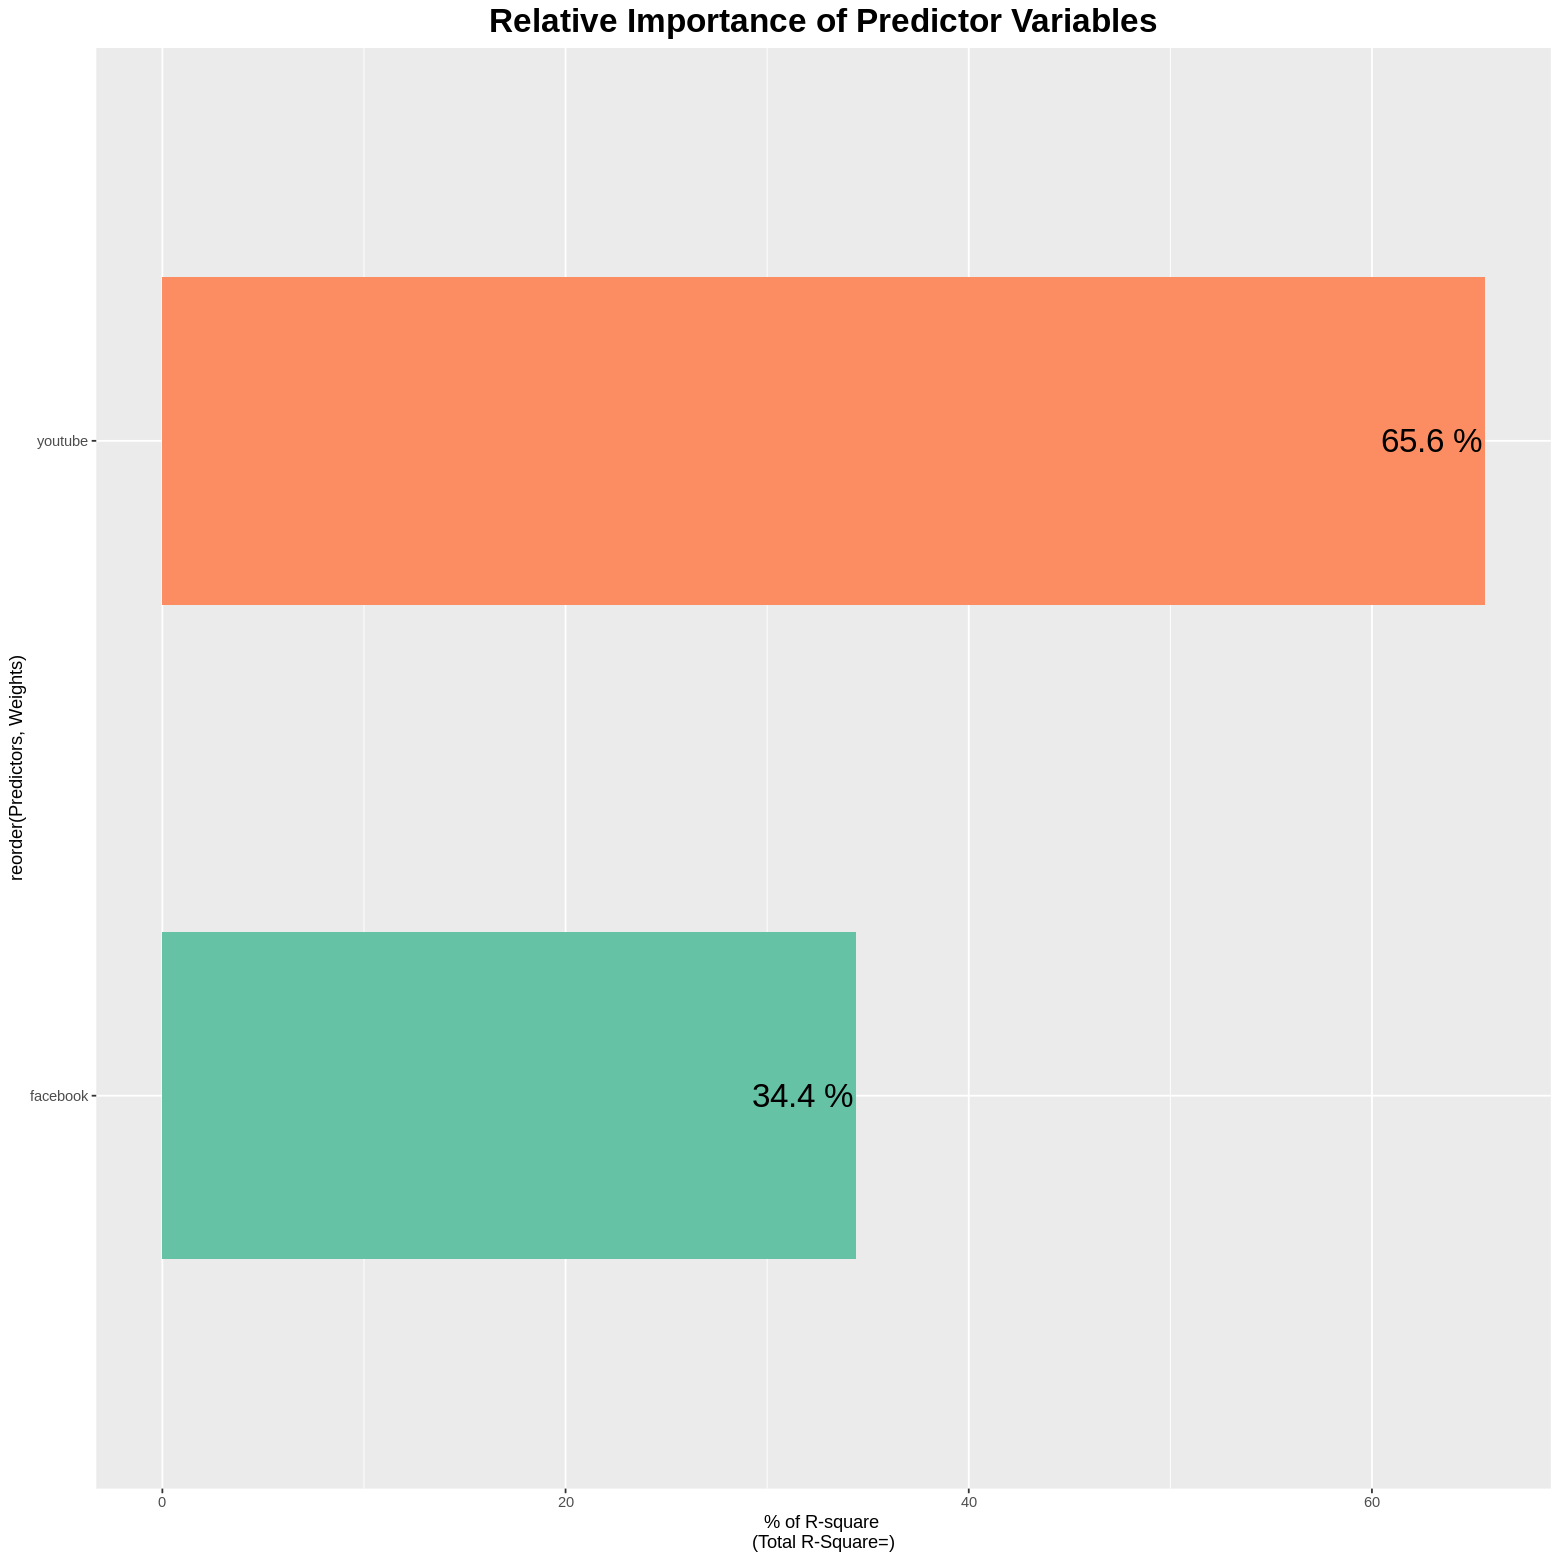

In [ ]:
plotRelWeights(model_2)

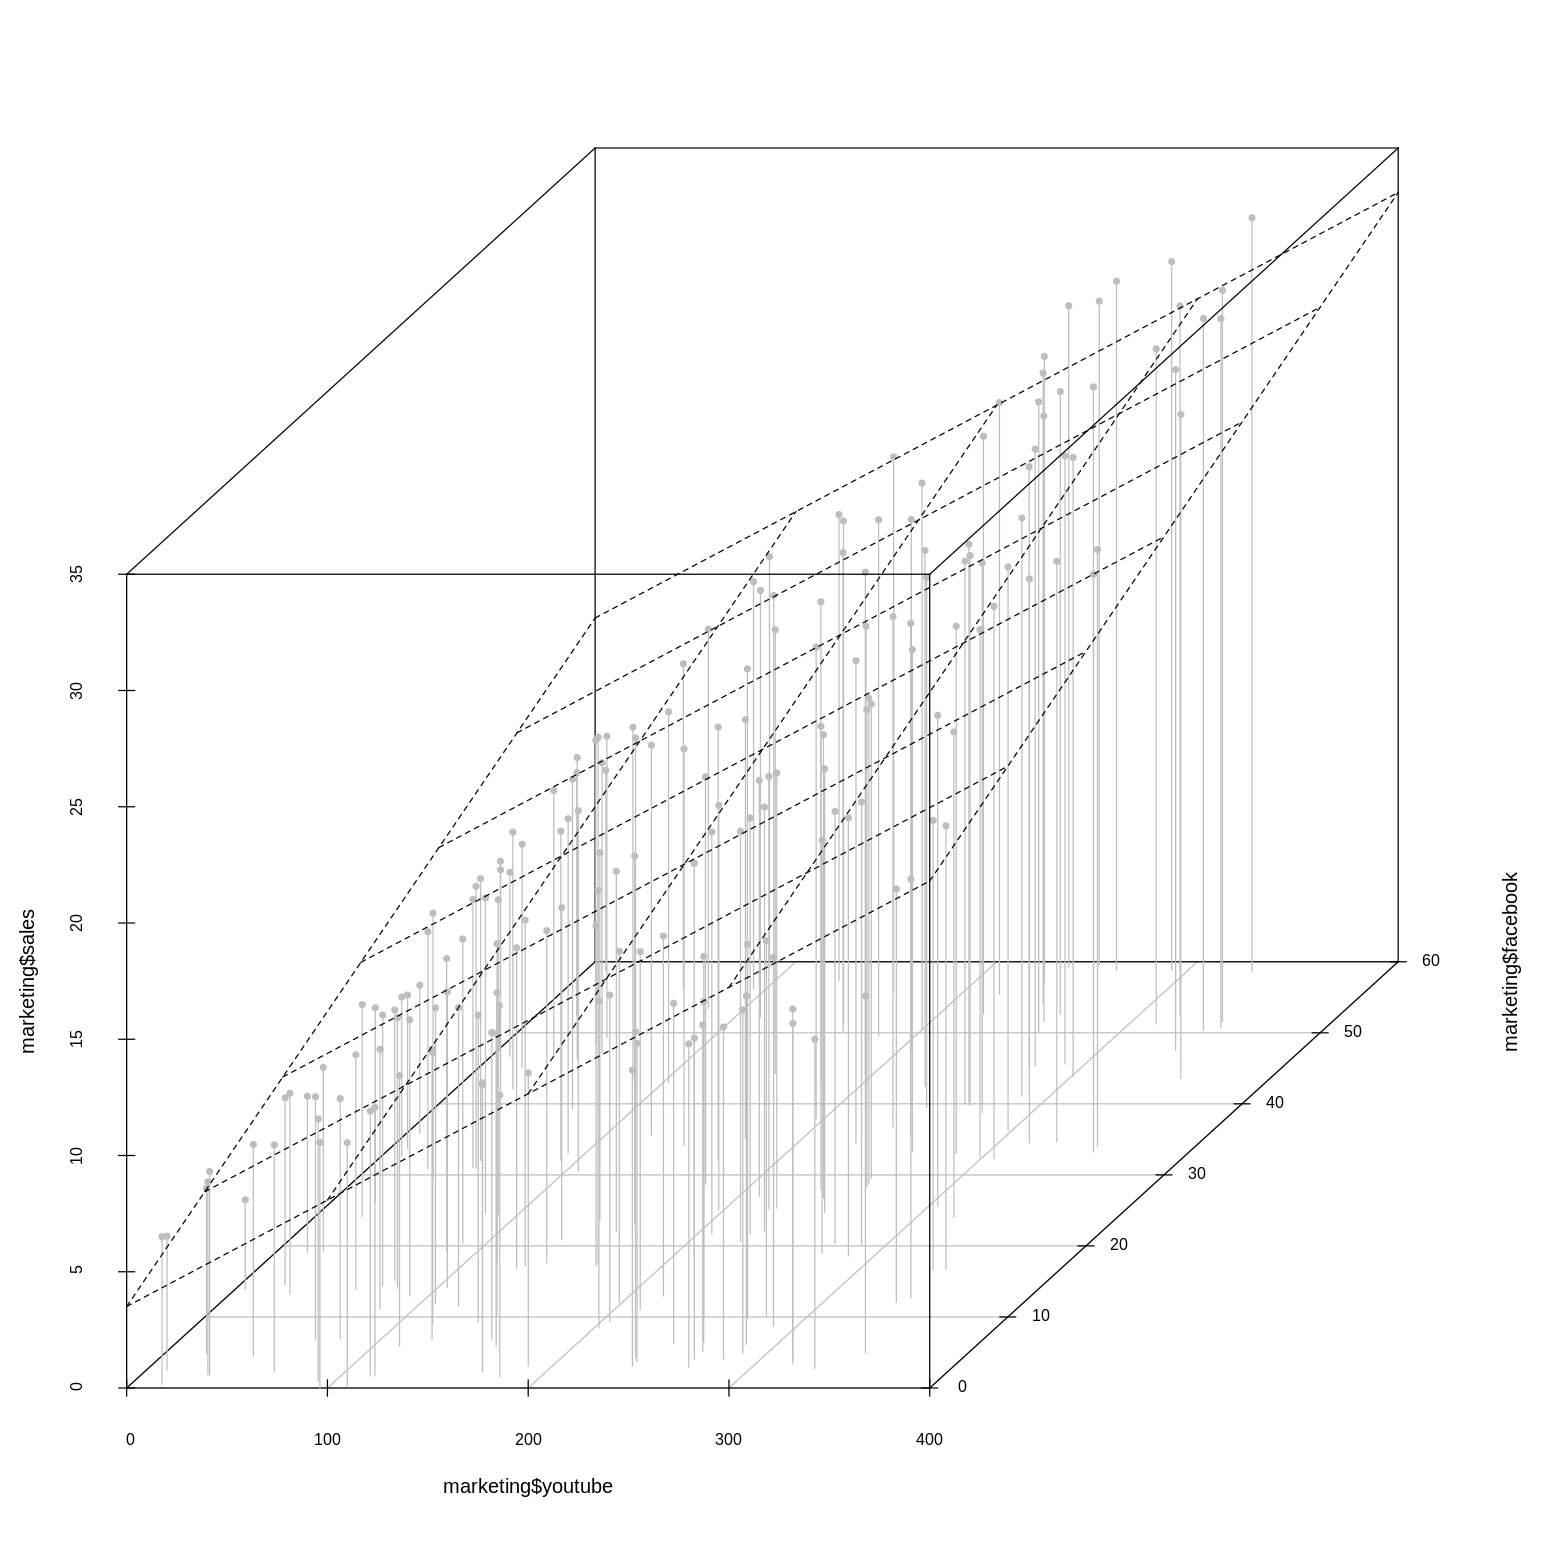

In [ ]:
# 3d 산점도
library(scatterplot3d)

s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 55, color = "grey")
s$plane3d(model_2)

* **예측**

In [ ]:
set.seed(51)
youtube_r <- sample(min(marketing$youtube):max(marketing$youtube), 60, replace = F)
facebook_r <- sample(min(marketing$facebook):max(marketing$facebook), 60, replace = F)

new_data <- tibble(youtube = youtube_r, facebook = facebook_r)

# predict
sales_r <- predict(model_2, new_data)

new_data <- new_data %>% bind_cols(tibble(sales_predict = sales_r))
new_data %>% show()

# A tibble: 60 x 3
   youtube facebook sales_predict
     <dbl>    <int>         <dbl>
 1   167.        16         14.1 
 2   339.        24         23.5 
 3    92.8       10          9.63
 4    45.8        8          7.11
 5    90.8       56         18.2 
 6   149.        50         19.7 
 7   194.        36         19.1 
 8   120.        28         14.3 
 9   294.        32         23.0 
10   165.        43         19.1 
# … with 50 more rows


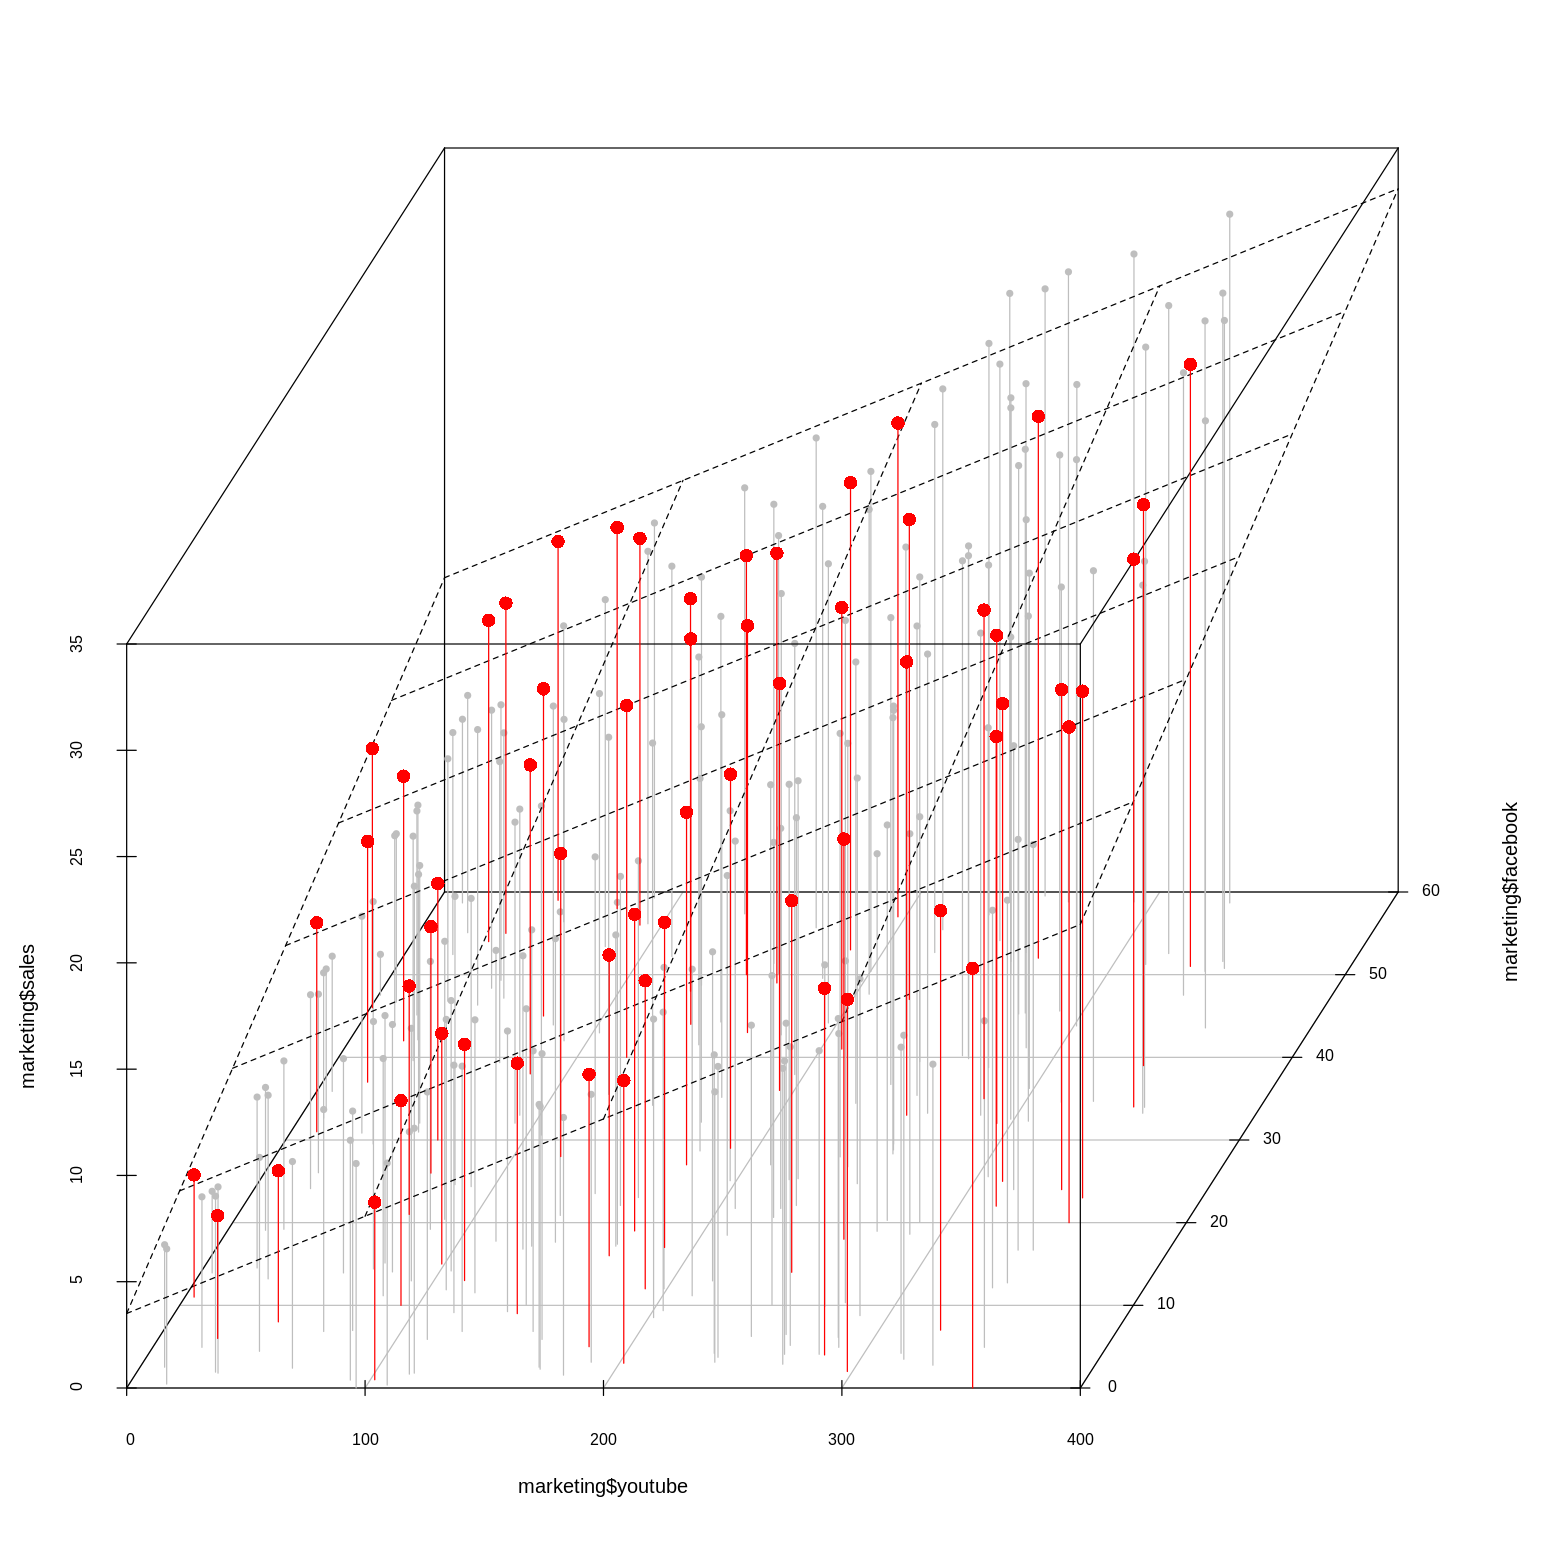

In [ ]:
# Add supplementary points
s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 70, color = "grey")
s$plane3d(model_2)
s$points3d(new_data$youtube, new_data$facebook, new_data$sales_predict, col = "red", type = "h", pch = 16, cex = 1.5)

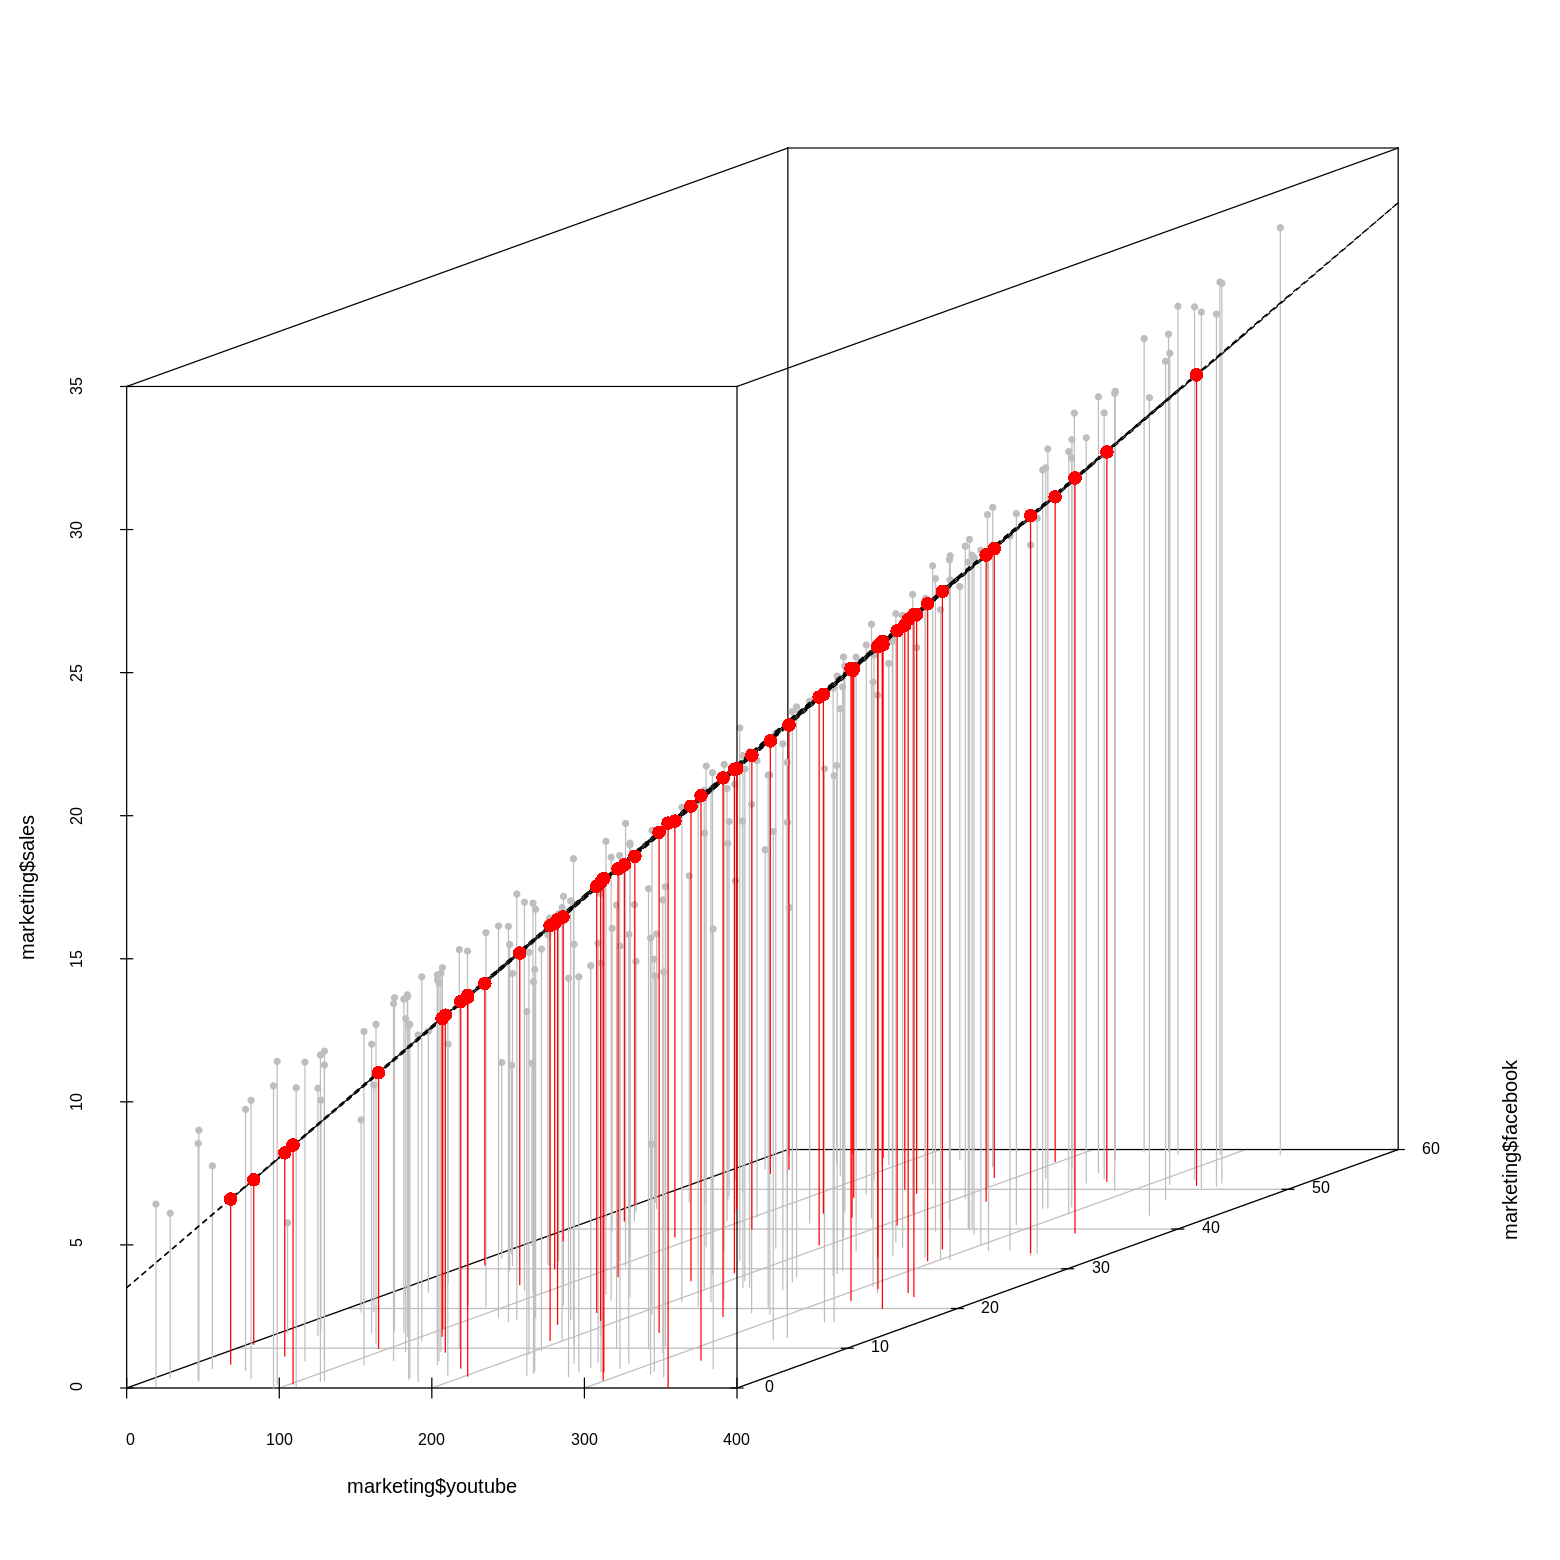

In [ ]:
s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 25, color = "grey")
s$plane3d(model_2)
s$points3d(new_data$youtube, new_data$facebook, new_data$sales_predict, col = "red", type = "h", pch = 16, cex = 1.5)